# ePPR - extended Projection Pursuit Regression
# $$\hat{y}_i=\bar{y}+\sum_{d=0}^D\sum_{m=1}^{M_d}\beta_{m,d}\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})$$
# with    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})=0$,    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}^2(\alpha_{m,d}^Tx_{i-d})=1$
# by minimizing    $f=\sum_{i=1}^n(y_i-\hat{y}(x_i))^2+\lambda\sum_{d=0}^D\sum_{m=1}^{M_d}\Vert{L\alpha_{m,d}}\Vert^2$
___
### References
Rapela, J., Felsen, G., Touryan, J., Mendel, J.M., and Grzywacz, N.M. (2010). ePPR: a new strategy for the characterization of sensory cells from input/output data. Network: Computation in Neural Systems 21, 35–90.

Friedman, J.H., and Stuetzle, W. (1981). Projection Pursuit Regression. Journal of the American Statistical Association 76, 817–823.
___

## Simulated Data
#### X: Natural Images
#### Y: Simulated Neuron with MFR=0.56, MIF=4.26

In [1]:
using Revise,FileIO
simdata=load("./simdata.jld");x=simdata["x"];y=simdata["y"];imagesize=(16,16);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 3 listeners. Value:
12000), Observable{Int64} with 3 listeners. Value:
12000, Scope("knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 3 listeners. Value:
12000, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\Alex\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":12000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n    

Observable{Any} with 0 listeners. Value:
Gray{Float64}[Gray{Float64}(0.360784) Gray{Float64}(0.47451) … Gray{Float64}(0.333333) Gray{Float64}(0.313725); Gray{Float64}(0.352941) Gray{Float64}(0.466667) … Gray{Float64}(0.32549) Gray{Float64}(0.309804); … ; Gray{Float64}(0.262745) Gray{Float64}(0.258824) … Gray{Float64}(0.0901961) Gray{Float64}(0.0901961); Gray{Float64}(0.258824) Gray{Float64}(0.247059) … Gray{Float64}(0.0784314) Gray{Float64}(0.0823529)]
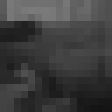
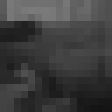

Observable{Any} with 0 listeners. Value:
5

In [2]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
yvalue = map(j->y[j],observe(i))
display.([i,xvalue,yvalue]);

## ePPR with Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 11112.474630241066, PenaltyLoss: 305.0251633942325.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1104500621411073
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10814.600713713407, PenaltyLoss: 60.50797730472669.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.6838390522108613
                                 step is λ = 0
New Term 3th iteration. TermLoss: 10610.756277362336, PenaltyLoss: 60.01142123258132.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7149549224196312
                                 step is λ = 0
New Term 4th iteration. TermLoss: 10392.78564357605, PenaltyLoss: 68.53256950264608.
NewtonTrustRegion 

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9793526230076446
                                 step is λ = 0
New Term 3th iteration. TermLoss: 7656.510473072265, PenaltyLoss: 2.5891103211783437.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = -0.030963592558492924
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.25
                                 ρ = -0.030963592558492924
                                 step is λ = 0
NewtonTrustRegion 3th iteration, r = 0.0625
                                 ρ = 0.1527537726079026
                                 step is easy
NewtonTrustRegion 4th iteration, r = 0.015625
                                 ρ = 0.8207892371442946
                                 step is easy
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 2.3700582130008145e-5.
Fit (Temporal-2, Spatial-3) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 763

Refit (Temporal-2, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 7491.101074936125, PenaltyLoss: 5.109099837713823.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.502193566907574
                                 step is easy
New Term 2th iteration. TermLoss: 7480.15409002671, PenaltyLoss: 7.155672723697108.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = -0.10805515331772589
                                 step is easy
NewtonTrustRegion 2th iteration, r = 0.015625
                                 ρ = 0.4925007246832676
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00042307317470852314.
ePPR Backward Stepwise ...


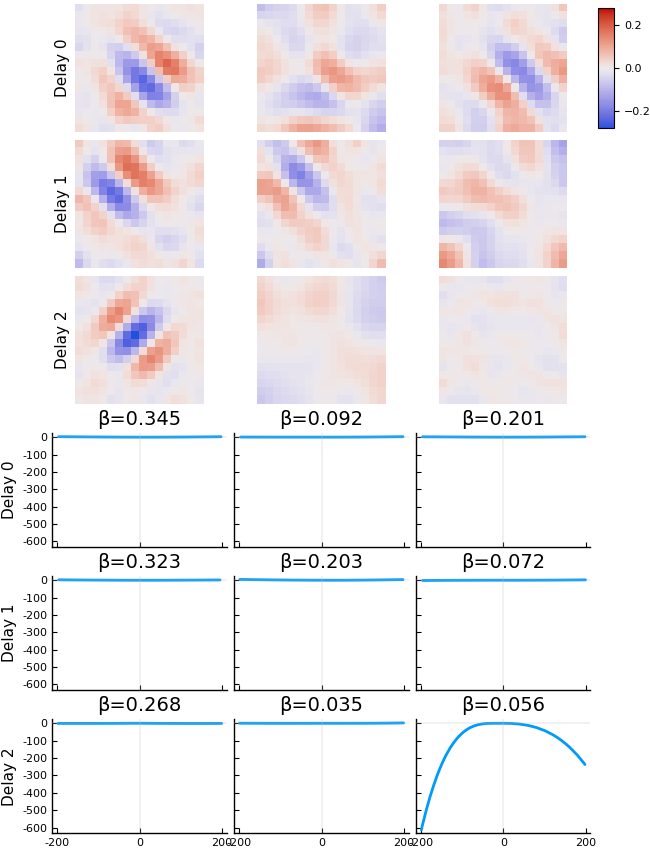

Drop Term: (temporal-2, spatial-2) with β: 0.03508814821345987.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.344711, 0.0921174, 0.200972, 0.322551, 0.202862, 0.0716351, 0.267744, 0.0563408]
New βs: [0.362249, 0.101801, 0.212815, 0.336417, 0.225287, 0.0937336, 0.269932, 0.0699393]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7478.911998948877, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.95573245216075
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7476.526763924106, PenaltyLoss: 77.65610872389324.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9445910915689347
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.182527021627703e-5.
Model Loss increased from 7844.408378896556 to 7847.843956123814. Discard the new term, keep the old one.
Refit (Temporal-0, Spati

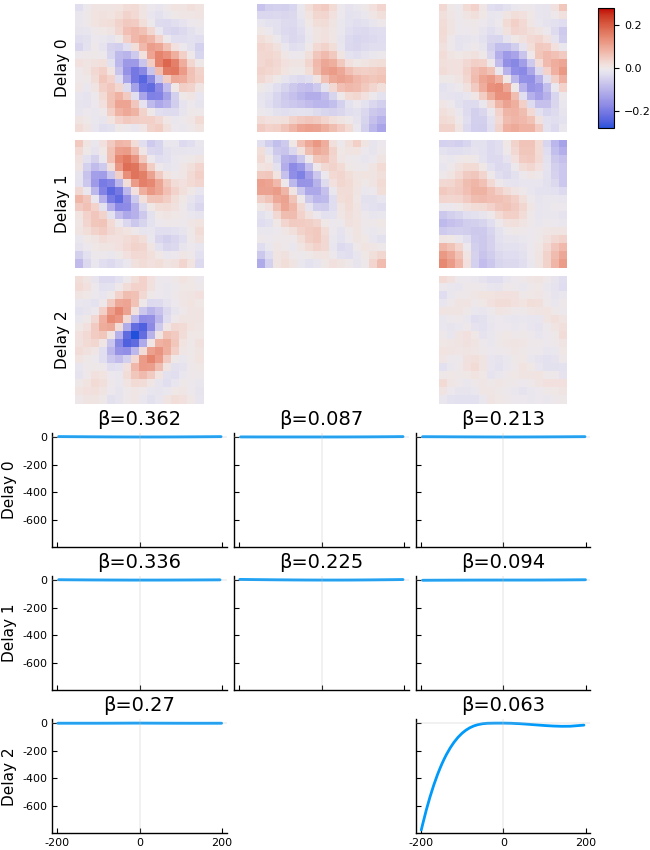

Drop Term: (temporal-2, spatial-3) with β: 0.06343992660884168.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.362249, 0.0869607, 0.212815, 0.336417, 0.225287, 0.0937336, 0.269932]
New βs: [0.36445, 0.100538, 0.214526, 0.33596, 0.224785, 0.0934616, 0.276984]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7520.241100791904, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.962389949938516
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7517.573583766673, PenaltyLoss: 77.88739749600342.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9406094183366753
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.2740322849524457e-5.
Model Loss increased from 7875.313087050655 to 7878.6809614403055. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
Ne

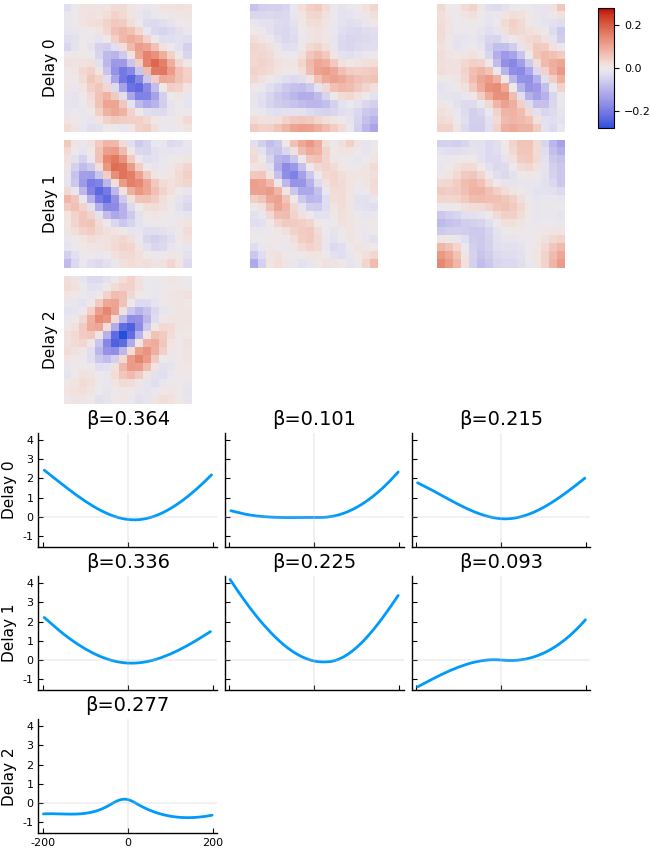

Drop Term: (temporal-1, spatial-3) with β: 0.09346164428646263.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.36445, 0.100538, 0.214526, 0.33596, 0.224785, 0.276984]
New βs: [0.36333, 0.100832, 0.21426, 0.323985, 0.22299, 0.276717]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7592.360020283094, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9559039882233692
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7590.068049235356, PenaltyLoss: 77.51594838623551.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9525650994641257
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.2663807989351854e-5.
Model Loss increased from 7934.076373248323 to 7937.104327617118. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. Term

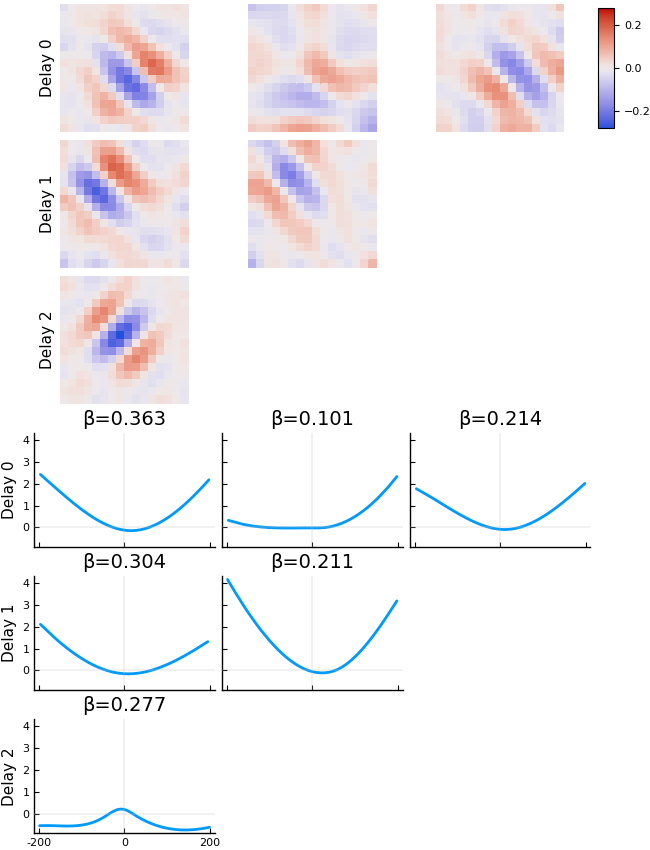

Drop Term: (temporal-0, spatial-2) with β: 0.1008319985196707.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.36333, 0.21426, 0.304283, 0.21079, 0.276717]
New βs: [0.369308, 0.237644, 0.324798, 0.227885, 0.276184]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7644.284632501665, PenaltyLoss: 76.11352886162574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9645527165743197
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7633.694159163458, PenaltyLoss: 80.99105291932378.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.957633366647816
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.486464614234972e-5.
Refit (Temporal-0, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 7620.073497942763, PenaltyLoss: 49.84681530137929.
NewtonTrustRegion 1th iteration, r = 1.0
                             

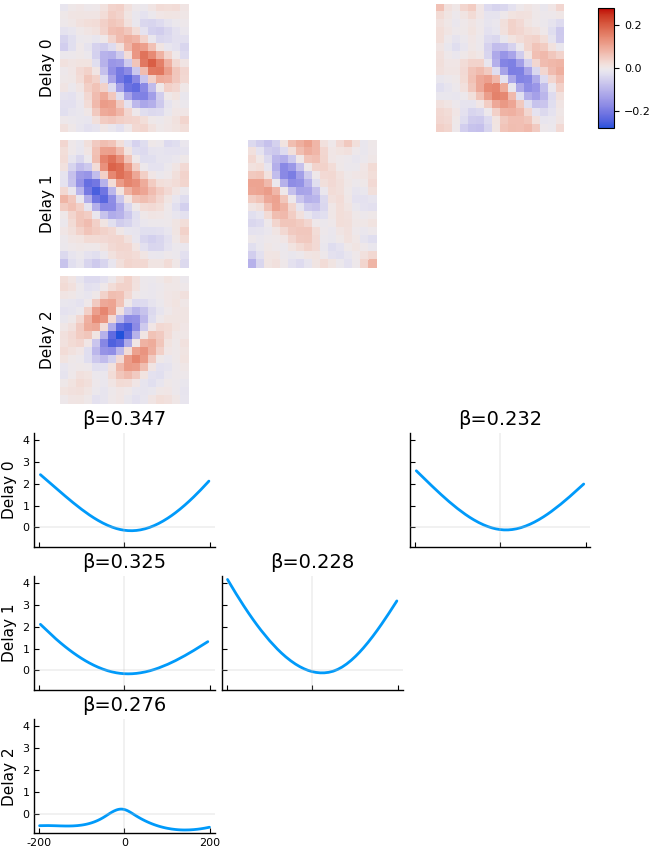

Drop Term: (temporal-1, spatial-2) with β: 0.2278847081021654.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.346764, 0.231774, 0.324798, 0.276184]
New βs: [0.364949, 0.248038, 0.371073, 0.277929]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8013.9826056416905, PenaltyLoss: 81.7317965248788.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9135876409740519
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8005.630904899926, PenaltyLoss: 85.00122894877337.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8923545157672471
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.3048758387871063e-5.
Refit (Temporal-0, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 8008.387338743264, PenaltyLoss: 58.43209583177707.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.03991

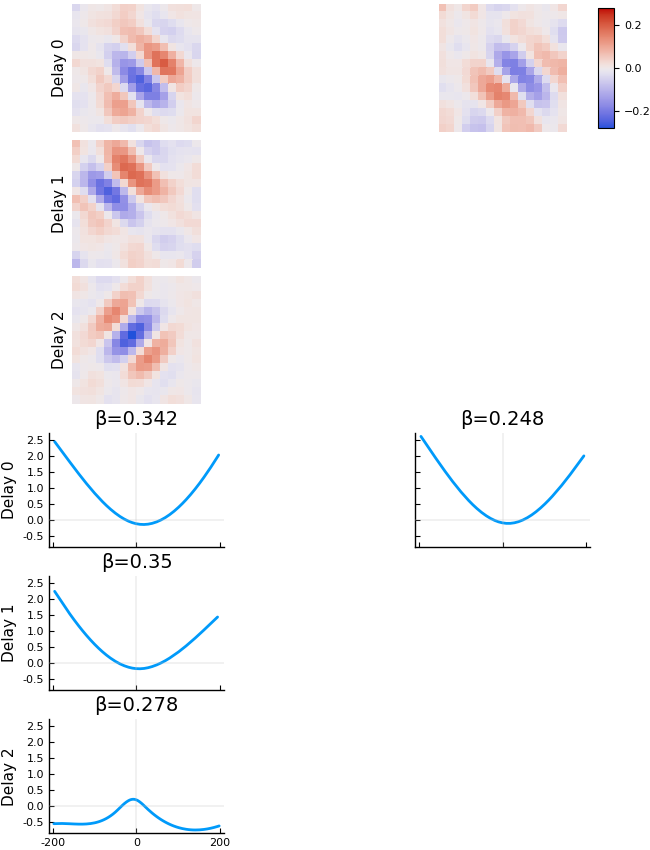

Drop Term: (temporal-0, spatial-3) with β: 0.2480378441923653.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.342212, 0.349752, 0.277929]
New βs: [0.416066, 0.375653, 0.277746]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8474.50395260164, PenaltyLoss: 85.64232338939357.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1074195990945181
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8424.516776452683, PenaltyLoss: 95.81319924902496.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.443208829246311
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8421.283040674864, PenaltyLoss: 96.9524663010117.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.4864105196053994
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00020810653787404338.
Refit 

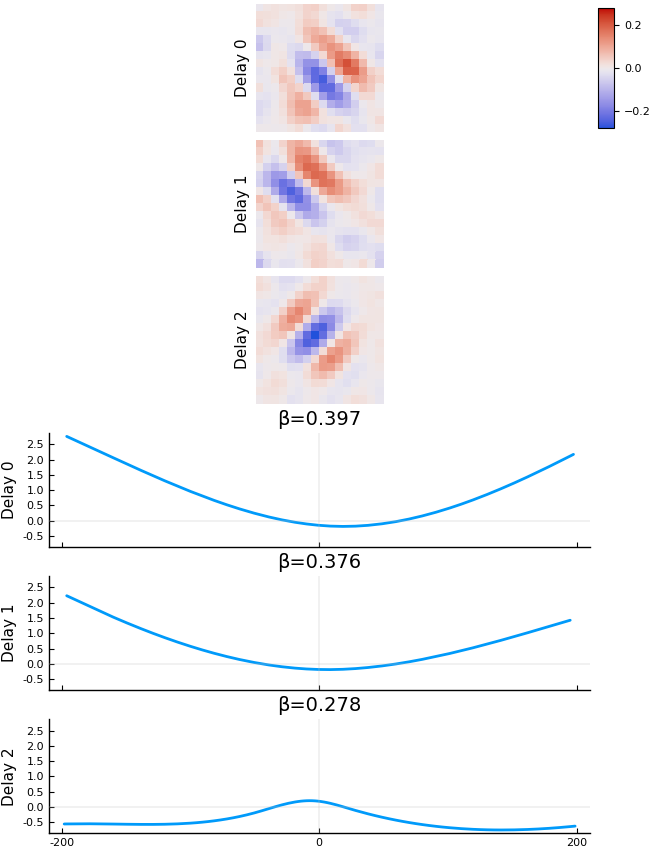

Drop Term: (temporal-2, spatial-1) with β: 0.2777456284023846.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.396876, 0.375653]
New βs: [0.426615, 0.376974]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 9071.412023206592, PenaltyLoss: 98.11801923672571.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2440263282017368
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9066.220927790884, PenaltyLoss: 102.30633056949537.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.3886426871599227
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00010306366448078661.
Model Loss increased from 9241.061234398285 to 9246.06477763636. Discard the new term, keep the old one.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 9073.203105090191, PenaltyLoss: 76.29517418357095.
NewtonTrustRegion 

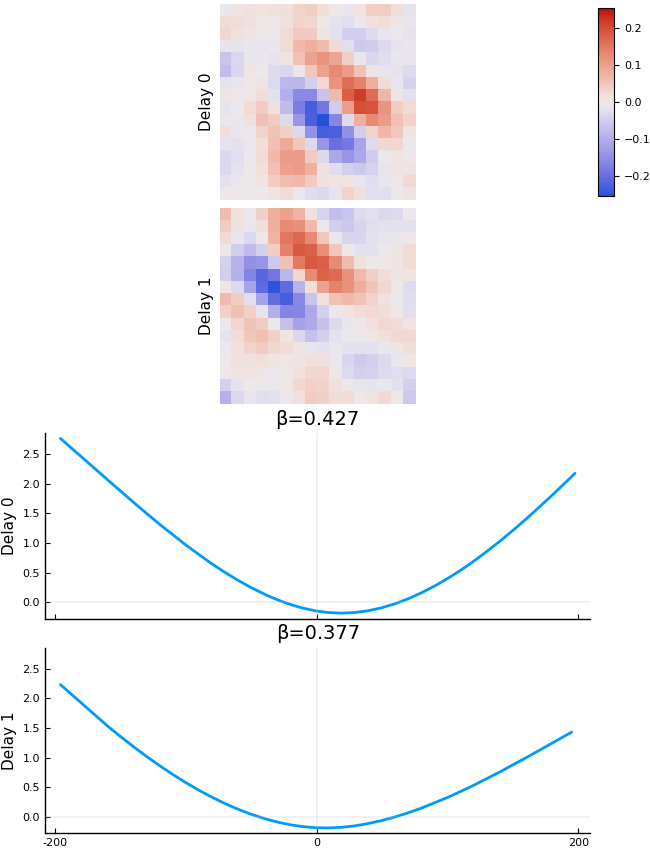

Drop Term: (temporal-1, spatial-1) with β: 0.37697403335207325.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.426615]
New βs: [0.431418]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10270.621185093521, PenaltyLoss: 98.11801923672571.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0945678515533859
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10261.290237642761, PenaltyLoss: 104.11750011947386.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.3229107643151843
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.667530507207621e-5.
Model Loss increased from 10365.040457225887 to 10366.800715108522. Discard the new term, keep the old one.


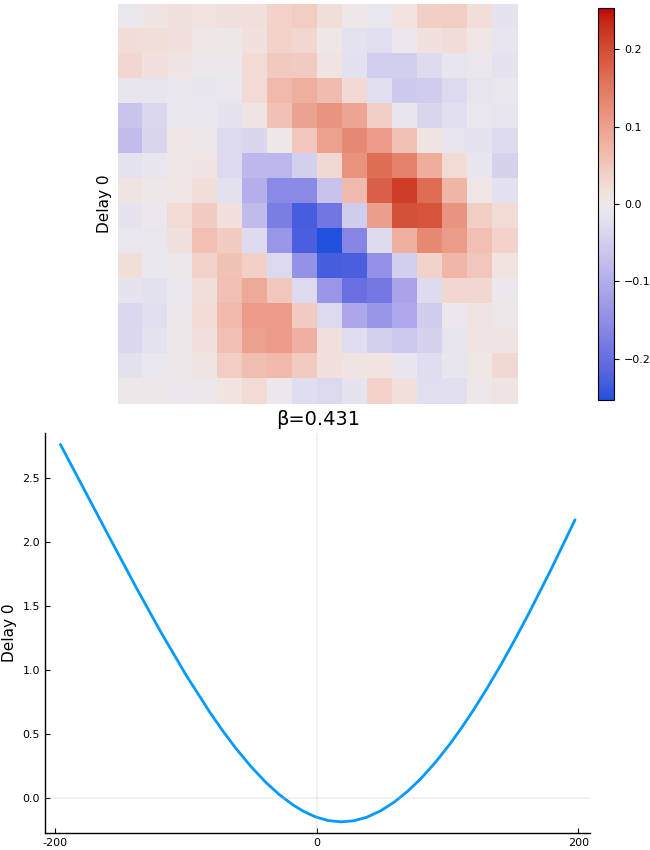

ePPR Models Cross Validation ...


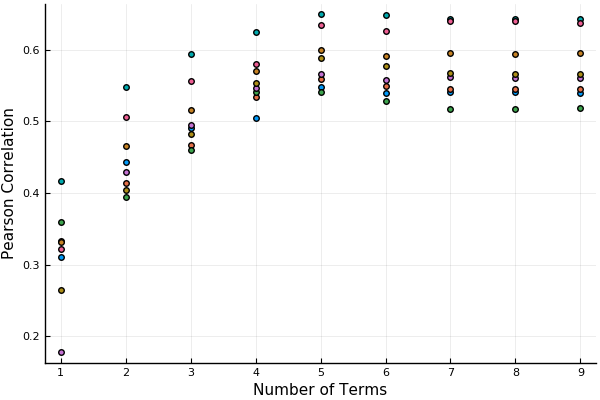

5th model with 5 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-2) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Refit Model βs ...
Old βs: [0.39626, 0.217491, 0.34665, 0.202653, 0.226007]
New βs: [0.366924, 0.247164, 0.324126, 0.227233, 0.277517]
Cross Validated ePPR Done.


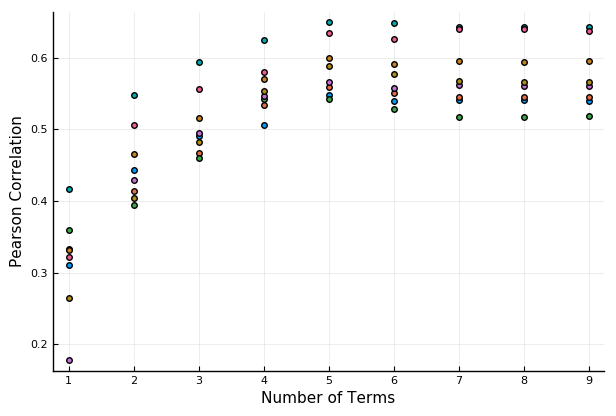

In [7]:
using ePPR
hp=ePPRHyperParams(imagesize...,nft=[3,3,3])
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y,hp,debug);

### Final Model

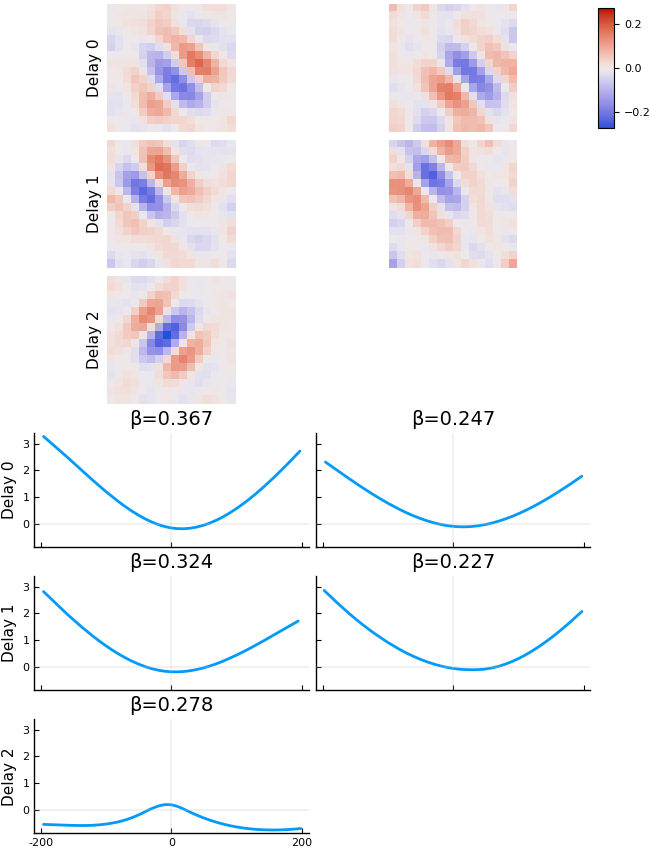

In [6]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Nonlinear Time Interaction, pool x[i-2:i, :] together ...
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 10486.089699581762, PenaltyLoss: 156.77090671095823.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2746563991252011
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9640.550806522482, PenaltyLoss: 132.02578049747558.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7062023292569712
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8775.964617987005, PenaltyLoss: 170.02325382643406.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.4667178408986112
                                 step is λ = 0
New Term 4th iteration. TermLoss: 8157.29956

New Term 1th iteration. TermLoss: 5884.74553521948, PenaltyLoss: 64.37548814429371.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7655254463368991
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5854.558420648588, PenaltyLoss: 40.66302523419546.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6947026395682656
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5847.8100966244165, PenaltyLoss: 39.3515036157919.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.5769656797304226
                                 step is λ = 0
New Term 4th iteration. TermLoss: 5846.38331448029, PenaltyLoss: 39.25392132724007.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.5627191508933422
                                 step is λ = 0
New Term converged in 4 iterations with (lossₒ-lossₙ)/lossₒ = 7.462817096784352e-5.
Re

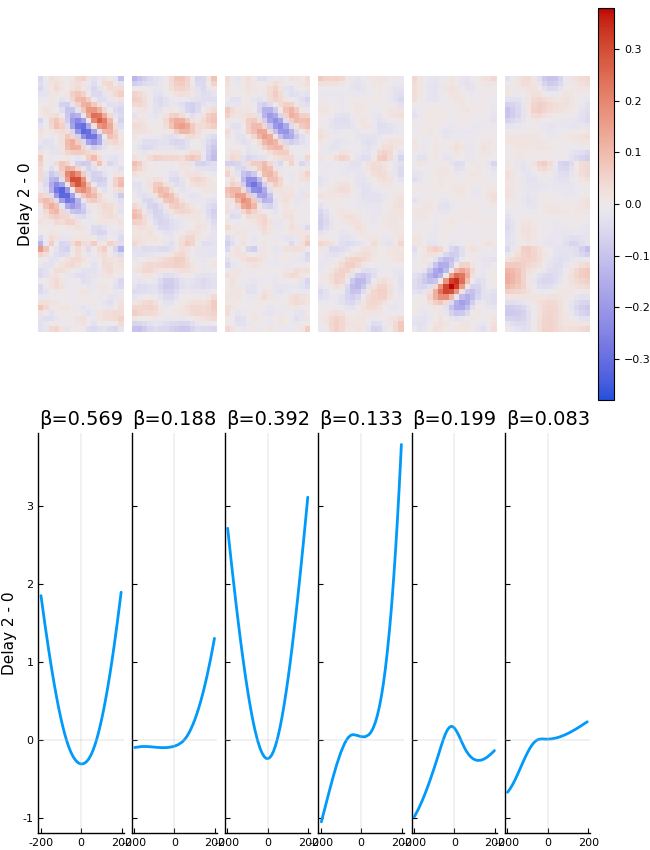

Drop Term: (temporal-0, spatial-6) with β: 0.08282112437569751.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.569042, 0.187753, 0.391973, 0.13304, 0.198775]
New βs: [0.601939, 0.159131, 0.421179, 0.135736, 0.232575]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 5823.046535943877, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9674251211251391
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5821.615104594111, PenaltyLoss: 213.51527009910404.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9804477661958492
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001854032565236573.
Model Loss increased from 6267.3098823219325 to 6288.370282959902. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 5794.77

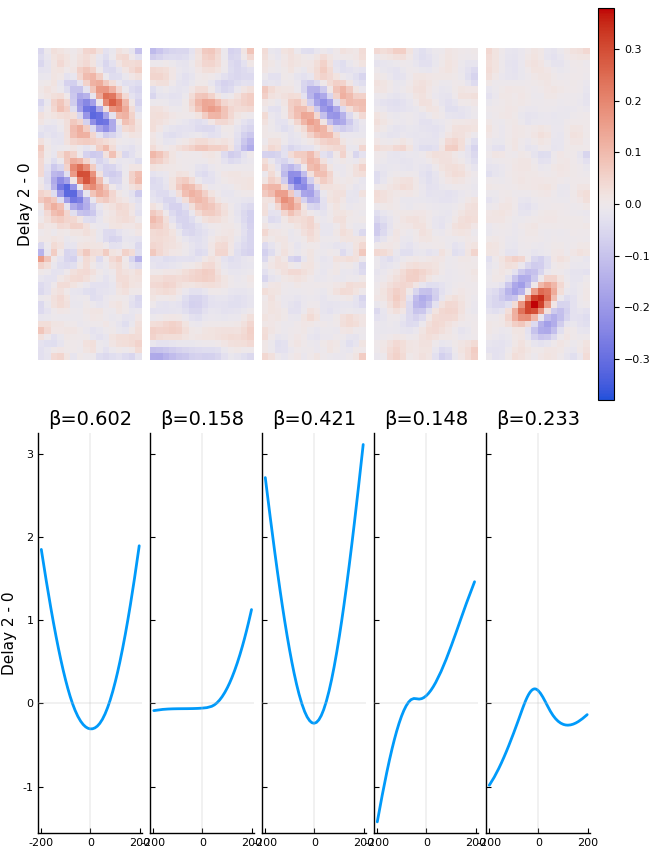

Drop Term: (temporal-0, spatial-4) with β: 0.14793521630732942.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.601939, 0.157649, 0.421179, 0.232575]
New βs: [0.589255, 0.12779, 0.410167, 0.247429]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 5939.755825544922, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9555943568429365
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5926.902214735913, PenaltyLoss: 217.4222659989682.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9611761829638452
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5928.658685271501, PenaltyLoss: 219.5772770485938.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9682178373415623
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001

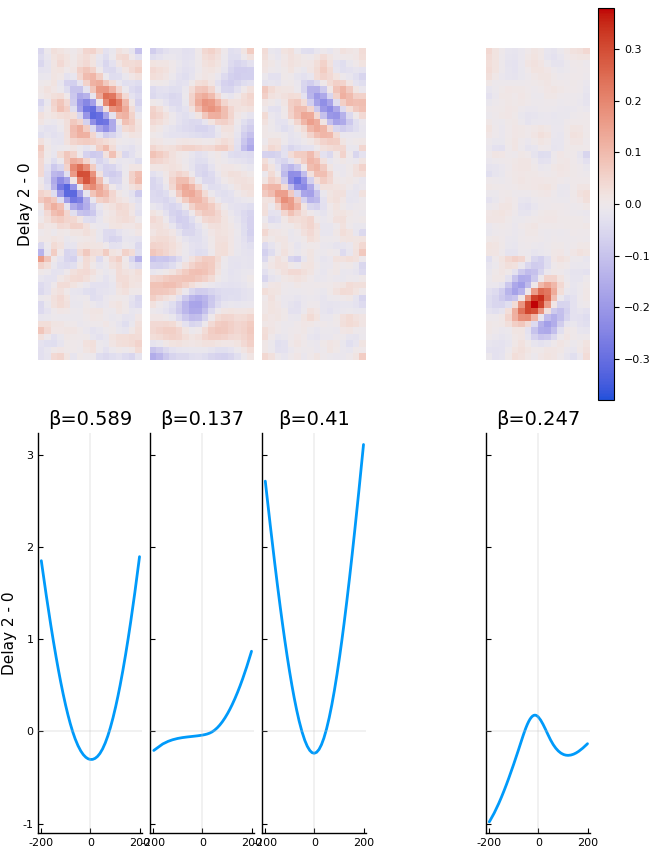

Drop Term: (temporal-0, spatial-2) with β: 0.13710075890841855.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.589255, 0.410167, 0.247429]
New βs: [0.602926, 0.428007, 0.24681]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 6072.722979274849, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9916355157201358
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6061.020537855273, PenaltyLoss: 216.8357027020794.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9765544135460438
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6062.806136759805, PenaltyLoss: 219.3082444147495.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9738563434260744
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00018464230004185096.
Mo

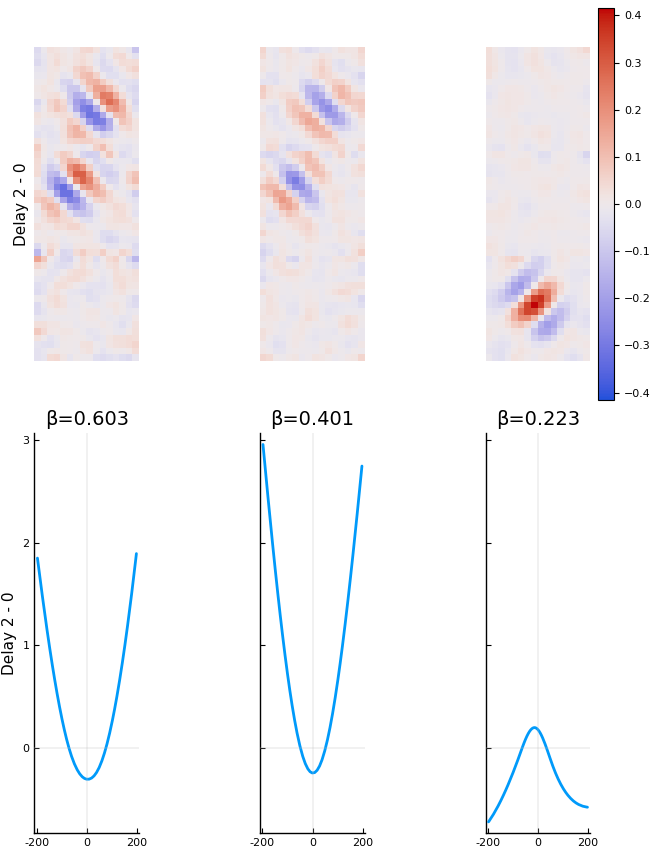

Drop Term: (temporal-0, spatial-5) with β: 0.22281073835644244.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.602926, 0.401369]
New βs: [0.604304, 0.430011]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 6542.290471908094, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.96931542261662
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6516.906184903098, PenaltyLoss: 227.9414192730401.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9215985732620795
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6518.376508251668, PenaltyLoss: 230.49824947291006.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.964079742508162
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00017073173411040376.
Model Loss increased fr

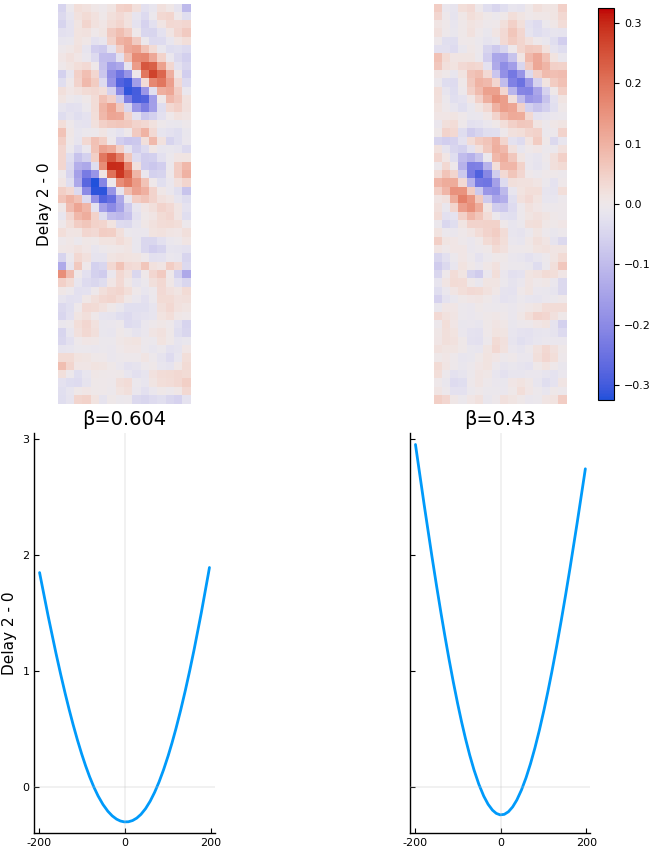

Drop Term: (temporal-0, spatial-3) with β: 0.43001117439717856.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.604304]
New βs: [0.668613]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8087.376402214405, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.038270463958484
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8008.588565973064, PenaltyLoss: 238.0821748413653.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0474495118929896
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8009.379732978903, PenaltyLoss: 241.15369842797688.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0466664481599053
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00023596737452065273.


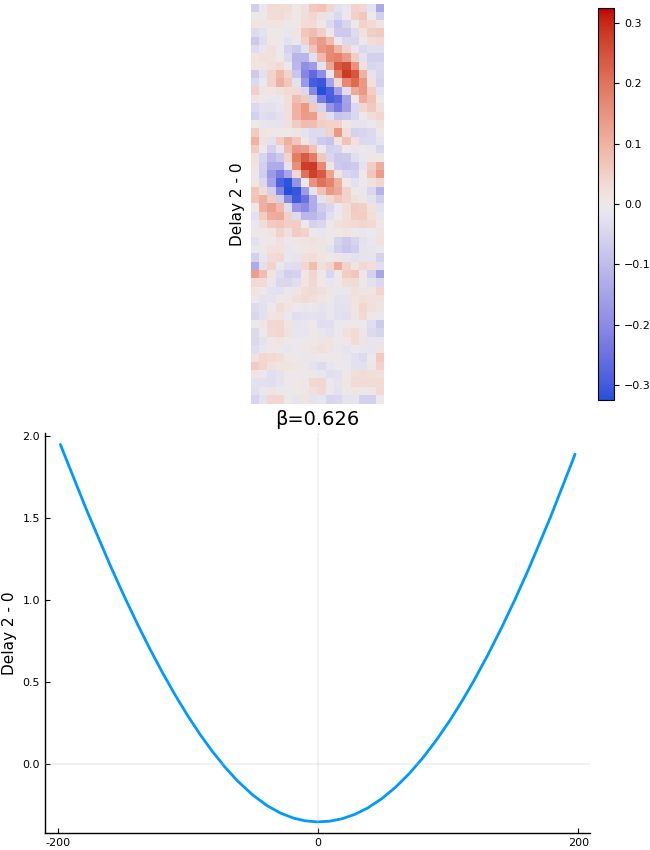

ePPR Models Cross Validation ...


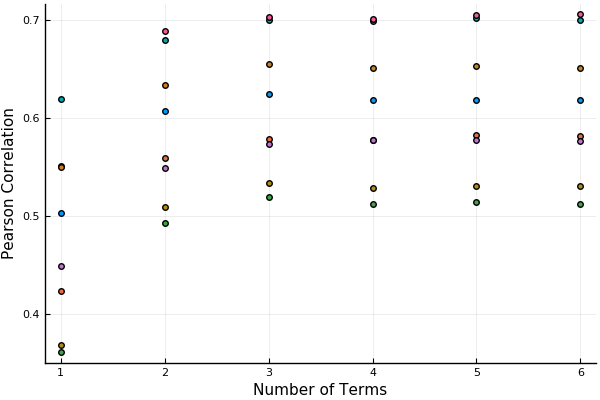

3th model with 3 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-0, Spatial-3) New Term ...
Refit Model βs ...
Old βs: [0.619553, 0.393692, 0.222972]
New βs: [0.599627, 0.431602, 0.267254]
Cross Validated ePPR Done.


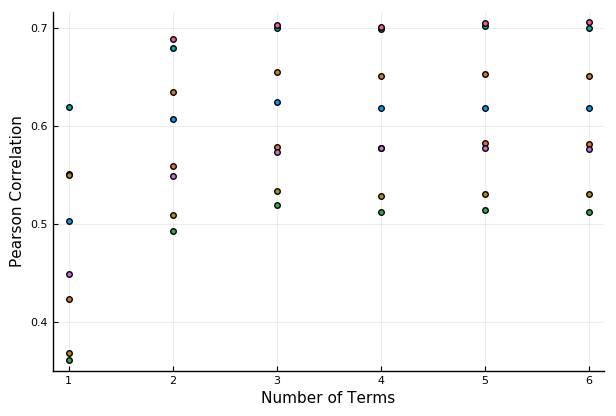

In [9]:
using ePPR
hp=ePPRHyperParams(imagesize...,ndelay=3,lambda=15,nft=[6])
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y,hp,debug);

### Final Model

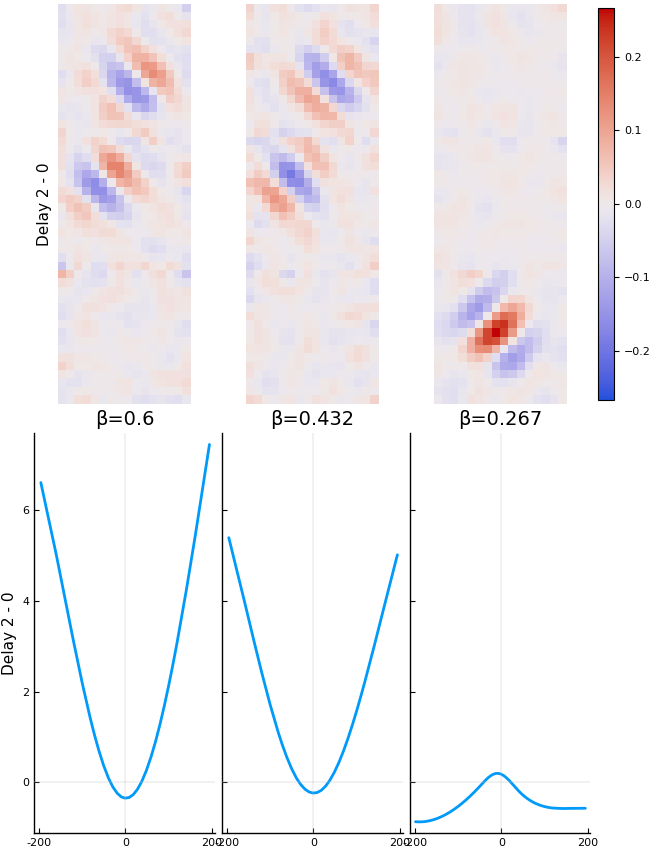

In [8]:
plotmodel(model,hp)

## Data Recorded from an Anesthetized Cat
#### X: Natural Images each present 40ms
#### Y1: Neuron Spike Sum
#### Y2: Neuron Spike Sum

In [1]:
using Revise,FileIO
data=load("./data.jld");x=data["x"];y1=data["y1"];y2=data["y2"];imagesize=(12,12);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6b3a5b6c8f72e1db63ba57a141aa78843507c519-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 4 listeners. Value:
12000), Observable{Int64} with 4 listeners. Value:
12000, Scope("knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 4 listeners. Value:
12000, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\Alex\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":12000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-ab2908ac-8e0d-45c9-8731-d30a9c0e60fe\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n    

Observable{Any} with 0 listeners. Value:
Gray{Float64}[Gray{Float64}(0.537255) Gray{Float64}(0.360784) … Gray{Float64}(0.298039) Gray{Float64}(0.329412); Gray{Float64}(0.360784) Gray{Float64}(0.329412) … Gray{Float64}(0.74902) Gray{Float64}(0.74902); … ; Gray{Float64}(0.270588) Gray{Float64}(0.329412) … Gray{Float64}(0.419608) Gray{Float64}(0.388235); Gray{Float64}(0.180392) Gray{Float64}(0.239216) … Gray{Float64}(0.388235) Gray{Float64}(0.388235)]
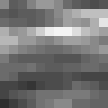
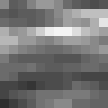

Observable{Any} with 0 listeners. Value:
0

Observable{Any} with 0 listeners. Value:
29

In [2]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
y1value = map(j->y1[j],observe(i))
y2value = map(j->y2[j],observe(i))
display.([i,xvalue,y1value,y2value]);

## ePPR with Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Choose 5th trainset.
HyperParameter Search: λ = 7.0 ...
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 13995.343851319223, PenaltyLoss: 44.01809939869252.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9261406471563992
                                 step is λ = 0
New Term 2th iteration. TermLoss: 13888.393404586193, PenaltyLoss: 66.78102781801574.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9171623098655372
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00041946119087262526.
Fit (Temporal-0, Spatial-2) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 13835.97898716632, PenaltyLoss: 92.94799747698582.
NewtonTrustRegion 1th iteration, r = 1.0
      

Refit (Temporal-0, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 11226.27315887205, PenaltyLoss: 14.920698323827867.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9196352692273052
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11209.074481965203, PenaltyLoss: 11.659665305017924.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8594168754589337
                                 step is λ = 0
New Term 3th iteration. TermLoss: 11199.953931316639, PenaltyLoss: 12.436013393614813.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8827451761965603
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00016151952042514387.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11189.129010402203, PenaltyLoss: 130.8884033509762.
NewtonTrustRegion 1th iteration, r = 1.0
         

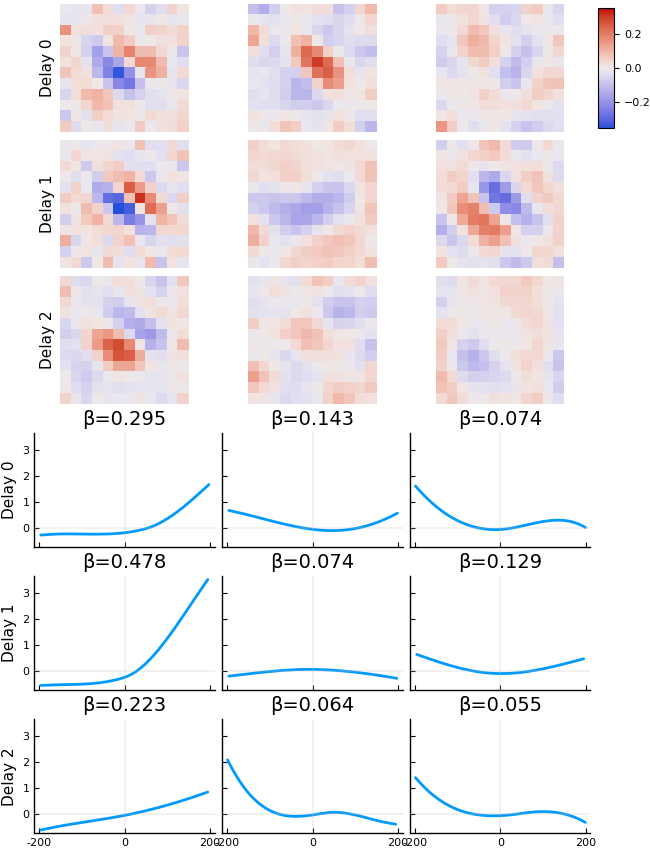

Drop Term: (temporal-2, spatial-3) with β: 0.05494309963140808.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.295446, 0.142689, 0.0735951, 0.478138, 0.0738593, 0.129205, 0.222873, 0.0641961]
New βs: [0.309859, 0.154741, 0.0803564, 0.476776, 0.0704319, 0.138791, 0.204391, 0.0716876]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10979.540349639426, PenaltyLoss: 55.65516197879196.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9631245298089509
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10971.776882144211, PenaltyLoss: 53.62197982819373.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9717411384088106
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00011314438609655826.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 10972.854289174198, PenaltyLoss: 29.6651836241

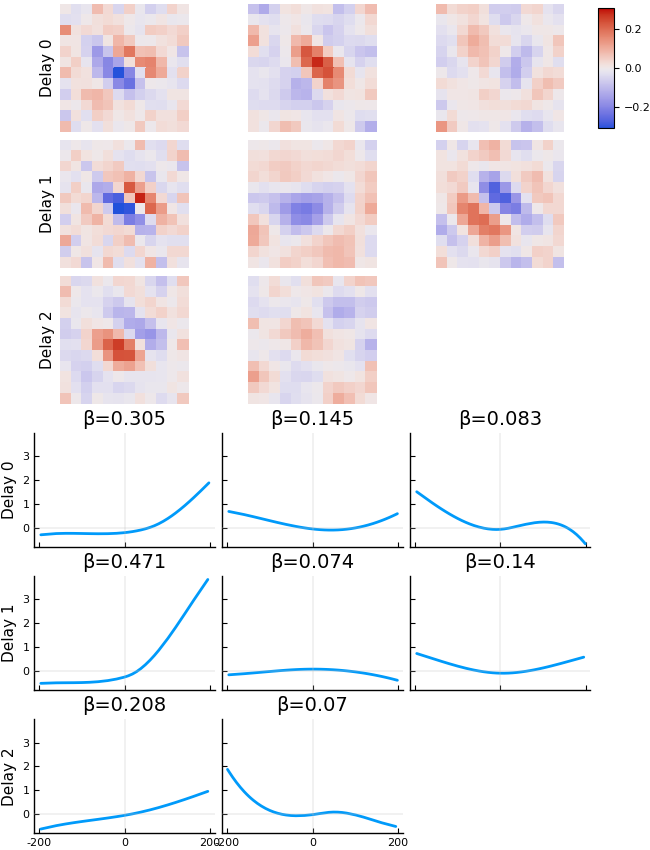

Drop Term: (temporal-2, spatial-2) with β: 0.06988563088006904.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.304705, 0.144615, 0.0827339, 0.471194, 0.0735322, 0.139559, 0.207737]
New βs: [0.312108, 0.155719, 0.0896417, 0.477496, 0.0802577, 0.148303, 0.209757]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10953.70291783595, PenaltyLoss: 52.86871213959032.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9934073417537234
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10949.007131870494, PenaltyLoss: 52.22197282062202.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9819167435345055
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.954111142949543e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 10950.182669185822, PenaltyLoss: 27.56025217501943.
NewtonTrustRegion 1

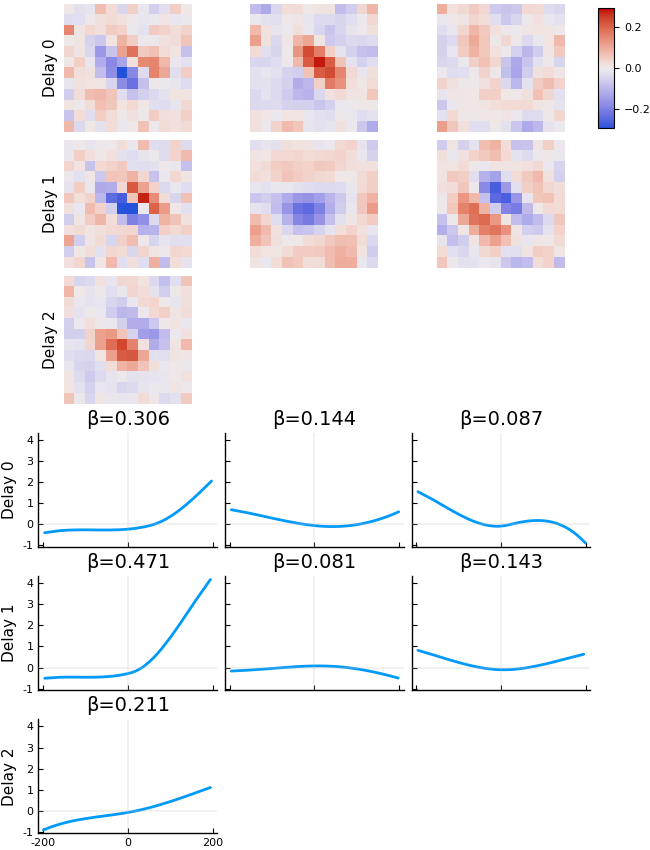

Drop Term: (temporal-1, spatial-2) with β: 0.08110952754106479.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.306179, 0.144444, 0.0872107, 0.470802, 0.142738, 0.211045]
New βs: [0.315983, 0.156117, 0.0970426, 0.486787, 0.153577, 0.212105]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10966.430322502489, PenaltyLoss: 51.46357101563277.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9899687216276802
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10962.347520878662, PenaltyLoss: 50.9787060473553.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9832480451805545
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 7.600425044951387e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 10963.132648207646, PenaltyLoss: 26.956862478661776.
NewtonTrustRegion 1th iteration, r = 1.0

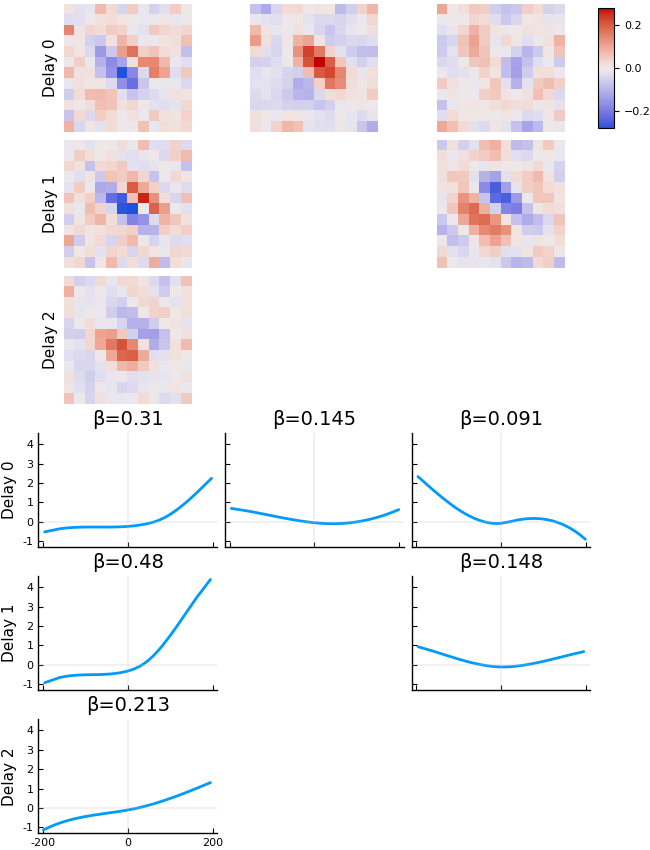

Drop Term: (temporal-0, spatial-3) with β: 0.09136530497422442.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.30975, 0.145162, 0.479853, 0.147845, 0.21278]
New βs: [0.309602, 0.154874, 0.489255, 0.156691, 0.213684]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11018.58597189049, PenaltyLoss: 50.24002040470233.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0614188198263237
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11011.83013408037, PenaltyLoss: 50.68717890502949.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0354628183158532
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 9.18028931500656e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11010.97657795044, PenaltyLoss: 26.378608981634486.
NewtonTrustRegion 1th iteration, r = 1.0
                          

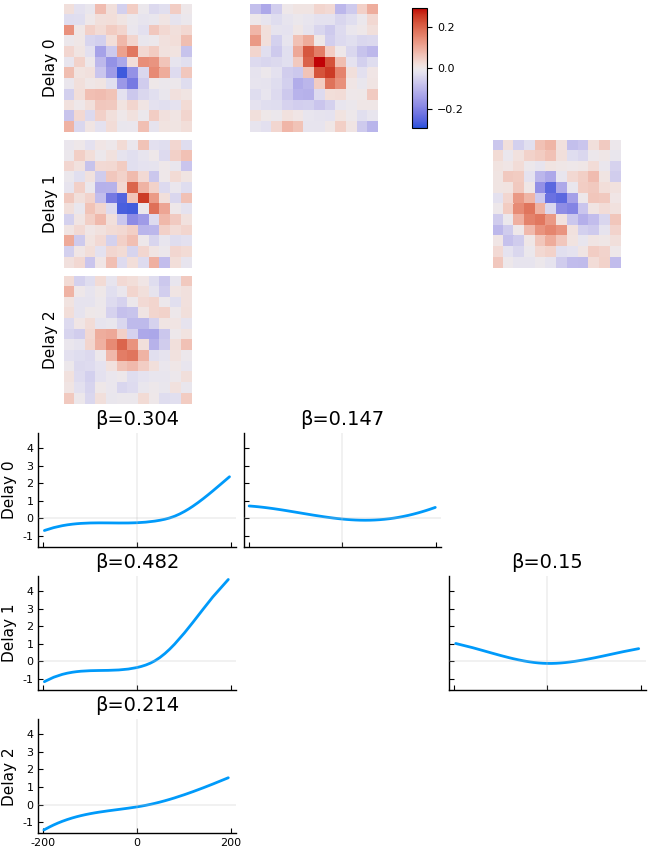

Drop Term: (temporal-0, spatial-2) with β: 0.14657121919488247.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.304031, 0.481577, 0.149991, 0.214321]
New βs: [0.303097, 0.490493, 0.159155, 0.214064]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11185.023847778055, PenaltyLoss: 50.14280400986816.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1187858130793442
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11177.406545118774, PenaltyLoss: 50.78598924738532.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1574226258680005
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00010520203755715088.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11175.023539302021, PenaltyLoss: 88.1719030872781.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9

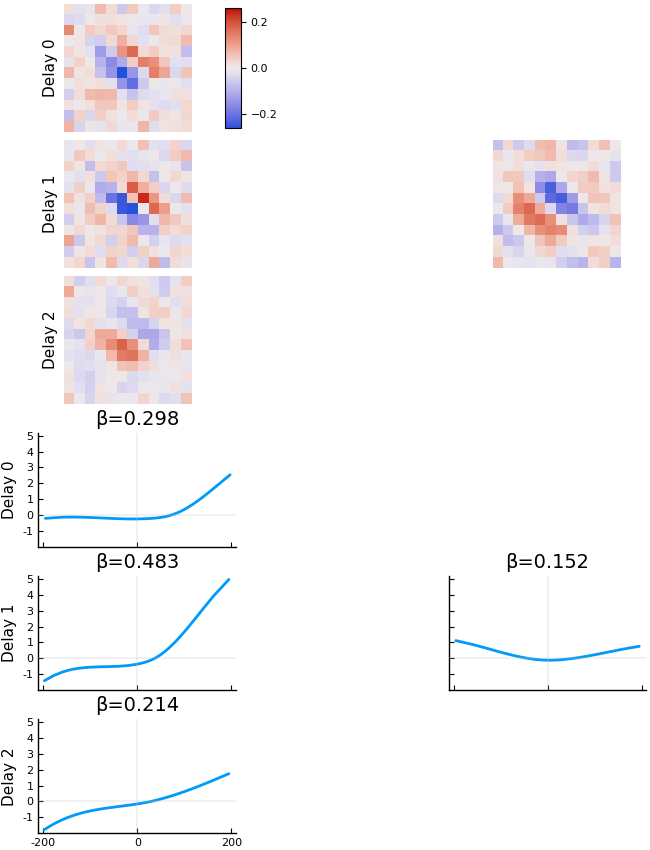

Drop Term: (temporal-1, spatial-3) with β: 0.15217356507955776.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.297706, 0.482897, 0.214319]
New βs: [0.30691, 0.493132, 0.215169]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11378.23905462555, PenaltyLoss: 50.51777707185518.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0024699740653904
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11373.311778701918, PenaltyLoss: 50.25074219830092.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0170778603642778
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 6.074310834887068e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11367.681158306828, PenaltyLoss: 83.54723359510953.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0328440118464162
       

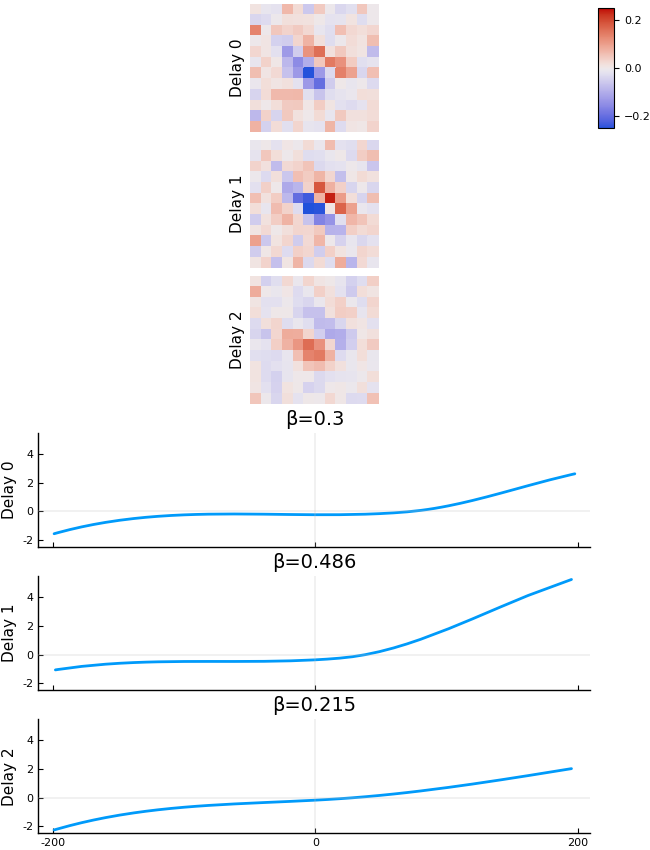

Drop Term: (temporal-2, spatial-1) with β: 0.21494888250947483.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.299937, 0.486121]
New βs: [0.307587, 0.495771]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11742.857851392851, PenaltyLoss: 49.32776265366346.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0360371260116894
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11737.750682343258, PenaltyLoss: 48.67394006661202.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0195529187636125
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 5.4895328441642165e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11737.122416903358, PenaltyLoss: 82.6036896056494.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9980765794571335
                         

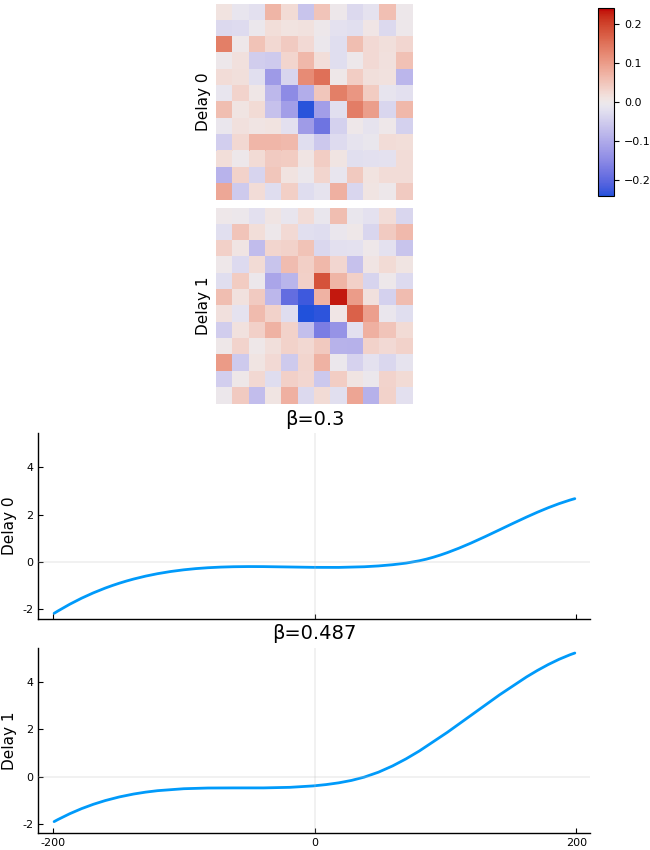

Drop Term: (temporal-0, spatial-1) with β: 0.30036123691842576.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.4874]
New βs: [0.498685]
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12537.388517462452, PenaltyLoss: 80.5247064171026.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0217817426067315
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12527.76113691423, PenaltyLoss: 82.51347434291779.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0033894575974518
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.79430367815305e-5.


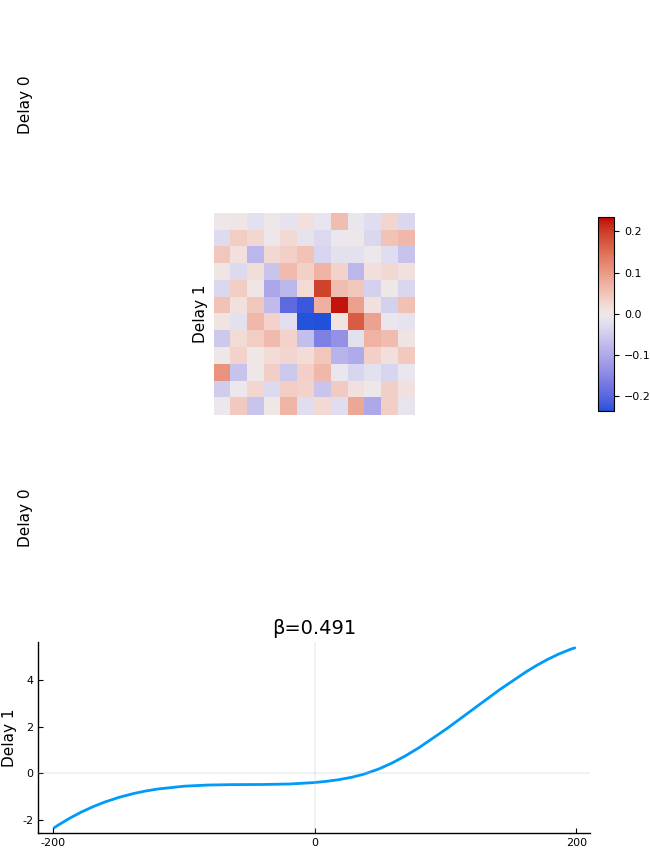

ePPR Models Cross Validation ...


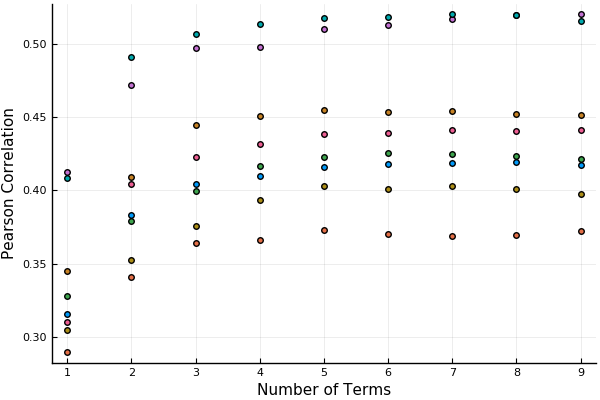

5th model with 5 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-2) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Refit Model βs ...
Old βs: [0.298738, 0.147259, 0.483789, 0.149405, 0.214807]
New βs: [0.309314, 0.159315, 0.489493, 0.159314, 0.215963]
Cross Validated ePPR Done.
HyperParameter Search: λ = 10.5 ...
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 13995.343851319223, PenaltyLoss: 66.02714909803876.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8951792207146896
                                 step is λ = 0
New Term 2th iteration. TermLoss: 13907.538432511335, PenaltyLoss: 72.61671125627146.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9213843980039113
 

New Term 3th iteration. TermLoss: 11299.236098760266, PenaltyLoss: 59.981471835045504.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9843006410285701
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00020356730082018686.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11245.423263351939, PenaltyLoss: 28.79318908361597.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1822985036215938
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11227.262431939469, PenaltyLoss: 29.016900107578508.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2195125168496261
                                 step is λ = 0
New Term 3th iteration. TermLoss: 11220.685037702999, PenaltyLoss: 31.16749071671373.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1846214137075

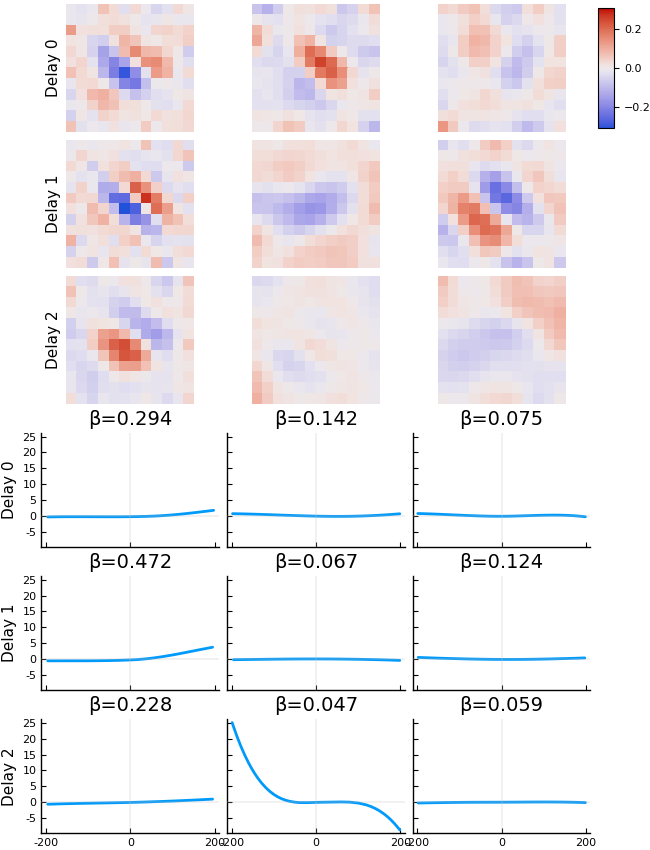

Drop Term: (temporal-2, spatial-2) with β: 0.04741476976244005.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.29446, 0.142321, 0.0754187, 0.472095, 0.0665334, 0.124193, 0.227774, 0.0588364]
New βs: [0.30658, 0.154508, 0.0805328, 0.469771, 0.0705313, 0.131316, 0.225729, 0.0498158]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11080.549422588676, PenaltyLoss: 58.405217979177706.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9842782363071884
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11073.750023987659, PenaltyLoss: 56.288912865287216.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9811847753045808
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00014240014812482848.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11074.993427399158, PenaltyLoss: 31.8394674006

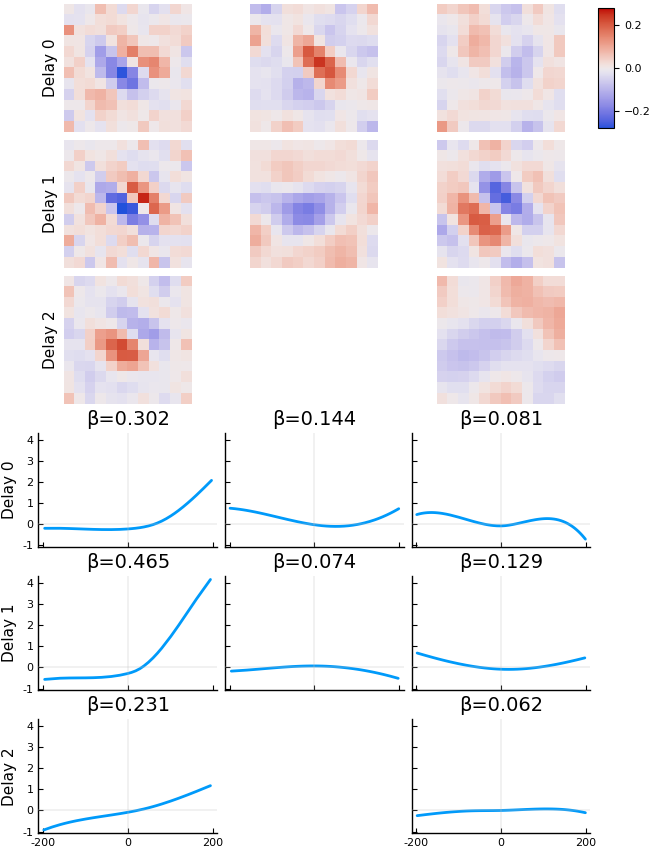

Drop Term: (temporal-2, spatial-3) with β: 0.06177152012573595.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.301523, 0.143622, 0.0811815, 0.464738, 0.0741149, 0.129464, 0.230678]
New βs: [0.309708, 0.155211, 0.0869819, 0.470606, 0.0791557, 0.136902, 0.204462]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11031.414030939899, PenaltyLoss: 55.04864311264952.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9872051742549942
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11026.682105016023, PenaltyLoss: 53.716166152838795.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9815117279336362
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00010889864250418407.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11027.435158619503, PenaltyLoss: 29.804366605397455.
NewtonTrustReg

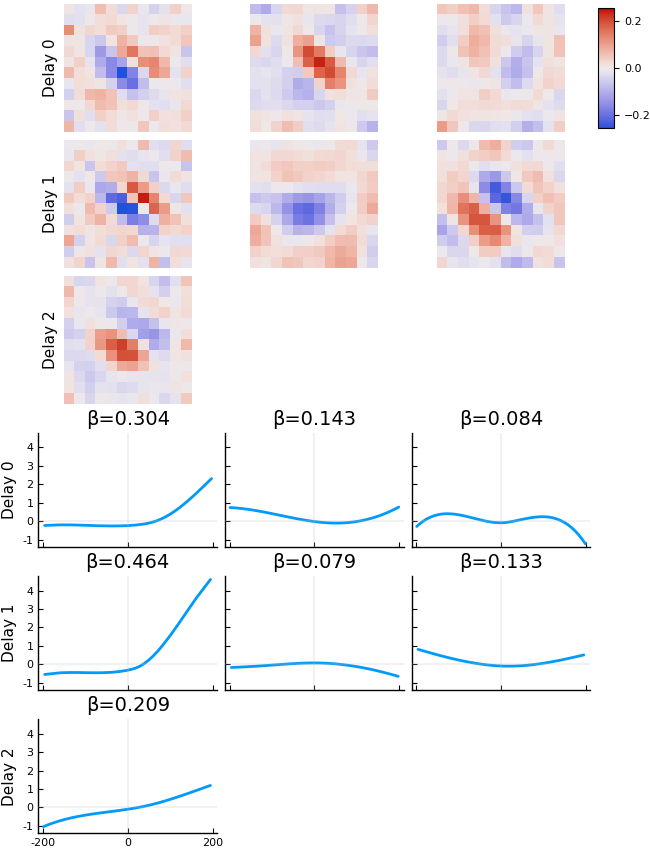

Drop Term: (temporal-1, spatial-2) with β: 0.07907416416998048.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.303888, 0.14343, 0.0842996, 0.464384, 0.13326, 0.208919]
New βs: [0.311853, 0.155533, 0.0914645, 0.485089, 0.142111, 0.210008]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11024.341649437598, PenaltyLoss: 52.74581869795273.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9952362336956736
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11019.893694286311, PenaltyLoss: 52.065289917875944.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9856344909516463
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.893112403359562e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11020.35431674686, PenaltyLoss: 29.100147593134935.
NewtonTrustRegion 1th iteration, r = 1.0


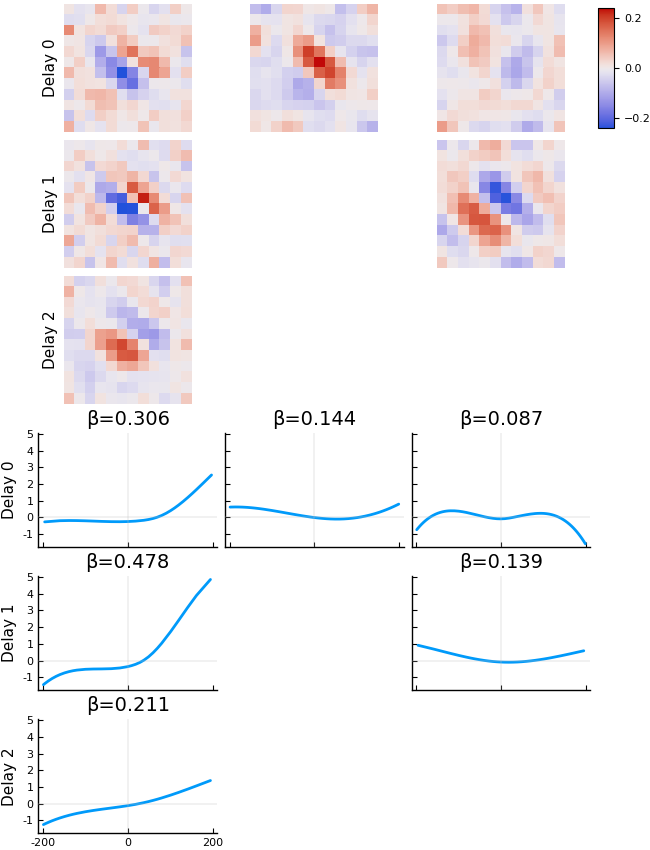

Drop Term: (temporal-0, spatial-3) with β: 0.08746545314974134.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.305744, 0.143765, 0.478244, 0.139471, 0.211064]
New βs: [0.308842, 0.153081, 0.487907, 0.147494, 0.211833]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11063.699062894604, PenaltyLoss: 51.322619864906045.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0298152008827446
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11058.050173641072, PenaltyLoss: 51.231231090131274.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0041483520340584
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 9.191884671154957e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11057.519808432004, PenaltyLoss: 28.56164157589423.
NewtonTrustRegion 1th iteration, r = 1.0
                   

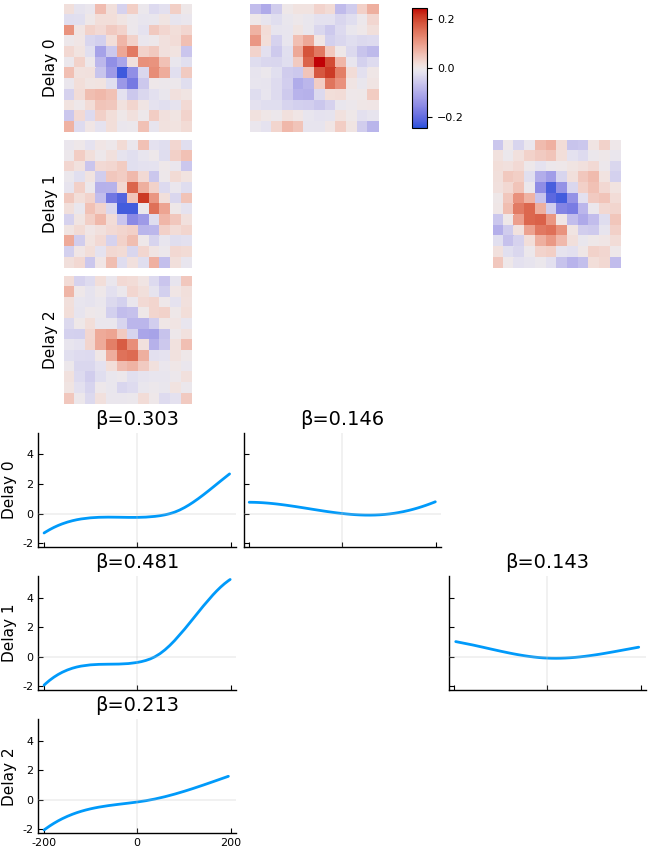

Drop Term: (temporal-1, spatial-3) with β: 0.1426554339568979.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.303013, 0.145615, 0.480601, 0.212665]
New βs: [0.309421, 0.157659, 0.491102, 0.213685]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11210.715131545936, PenaltyLoss: 50.616938053510275.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9814123856460711
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11205.111853486456, PenaltyLoss: 50.39538862065238.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9804944667597484
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 7.634384803170374e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11201.861714757426, PenaltyLoss: 30.789641609347587.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0

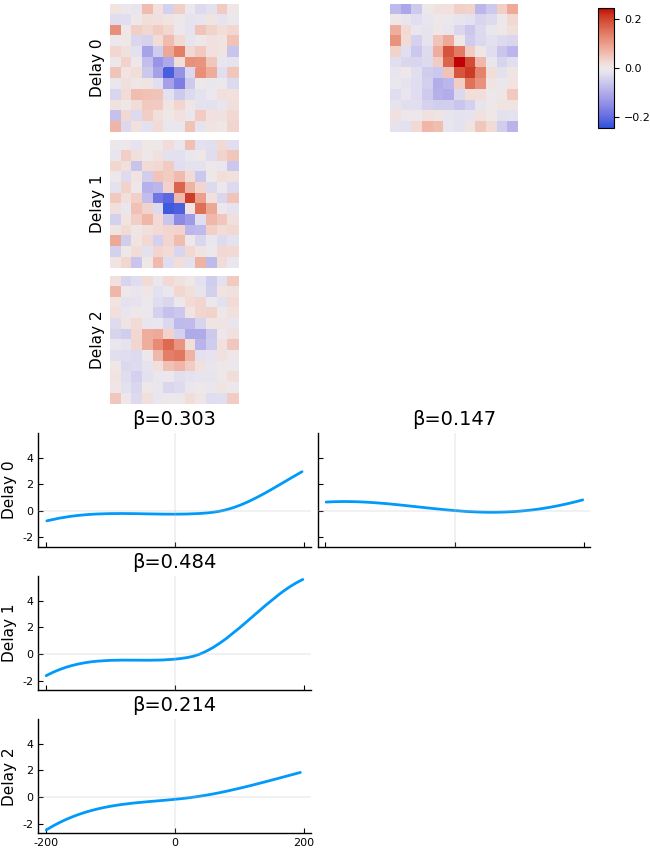

Drop Term: (temporal-0, spatial-2) with β: 0.14732997158195782.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.303456, 0.48403, 0.213809]
New βs: [0.304273, 0.49417, 0.213519]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11385.78027450306, PenaltyLoss: 49.627833747095515.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1316295298581929
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11377.33142587905, PenaltyLoss: 50.36973208374173.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.182493806932724
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00011091919733258617.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11375.666355870157, PenaltyLoss: 91.22650679348031.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9727383694343082
       

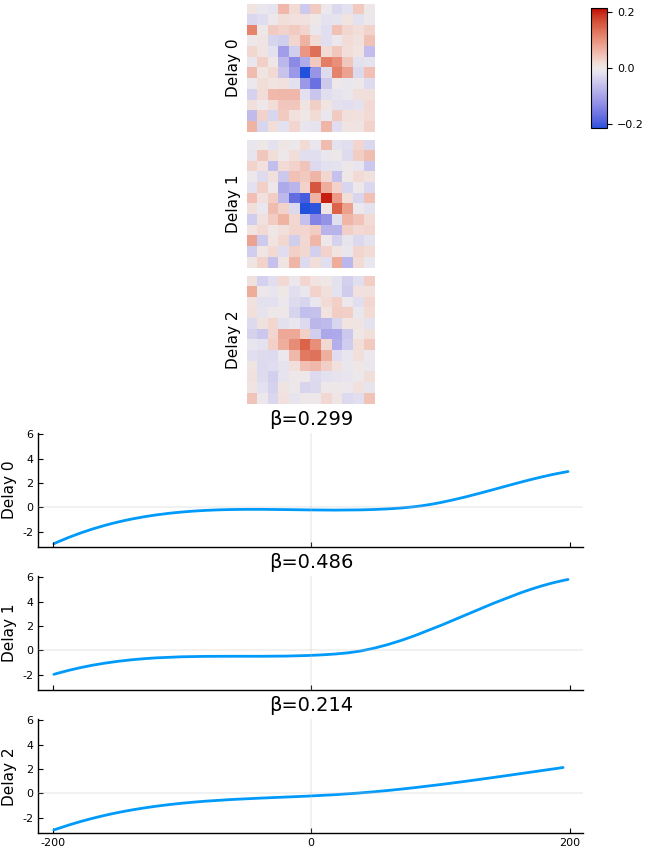

Drop Term: (temporal-2, spatial-1) with β: 0.21374651668302577.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.298728, 0.485862]
New βs: [0.306328, 0.495302]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11752.394997509266, PenaltyLoss: 50.1523463639539.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0682689783579389
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11746.892297349168, PenaltyLoss: 49.501602758195695.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.054089786729701
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 6.887511333576998e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11745.476671282753, PenaltyLoss: 86.11994854178828.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9910156370632724
                          

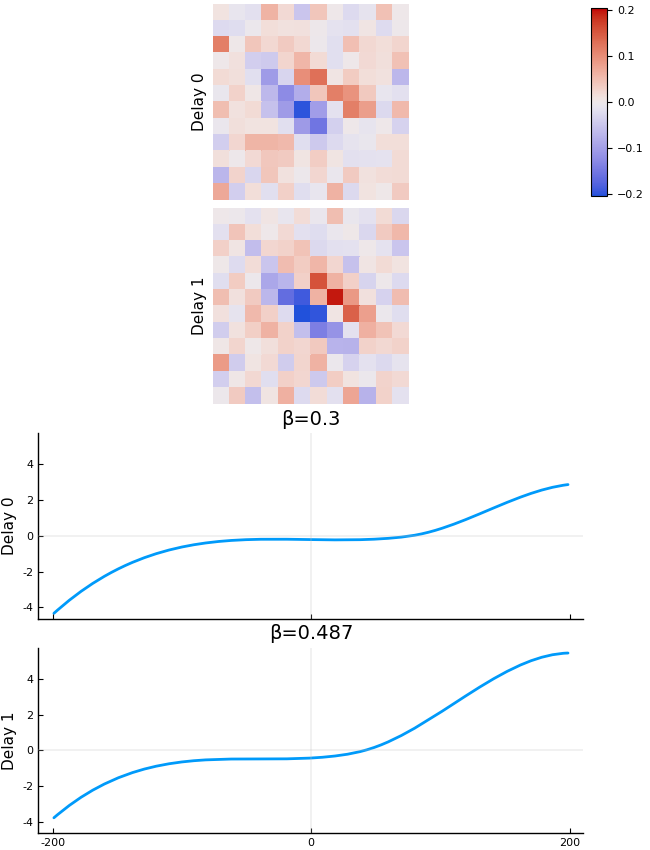

Drop Term: (temporal-0, spatial-1) with β: 0.29958885791127965.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.487065]
New βs: [0.498281]
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12540.43581253215, PenaltyLoss: 83.68449746137446.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.020656163926816
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12530.626800120655, PenaltyLoss: 85.45219097634701.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0003140391457295
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 4.6535502098778245e-5.


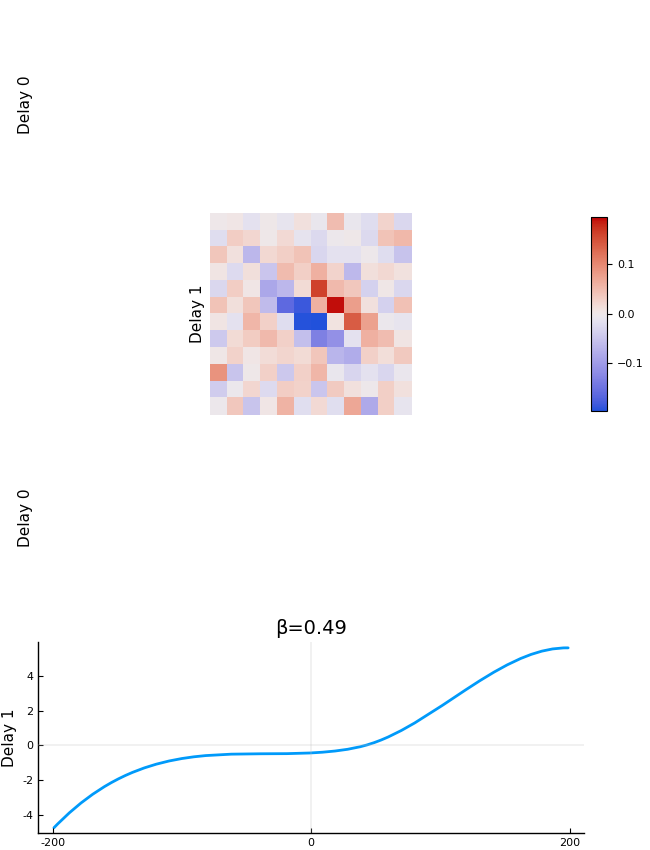

ePPR Models Cross Validation ...


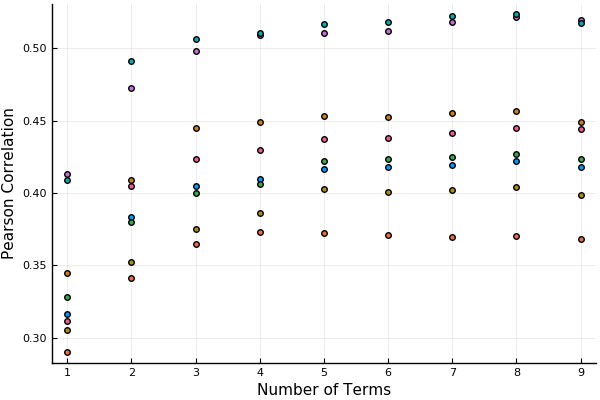

8th model with 8 terms is chosen.
Model drop spurious term: Any[(t = 0, s = 3)].
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-2) New Term ...
Fit Model (Temporal-1, Spatial-3) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Fit Model (Temporal-2, Spatial-2) New Term ...
Refit Model βs ...
Old βs: [0.292084, 0.141791, 0.480656, 0.0784433, 0.12892, 0.203792, 0.0464698]
New βs: [0.303765, 0.153618, 0.479096, 0.0787977, 0.137186, 0.243348, 0.0783876]
Cross Validated ePPR Done.
HyperParameter Search: λ = 15.75 ...
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 13995.343851319223, PenaltyLoss: 99.04072364705817.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8662546235089076
                                 step is λ = 0

New βs: [0.291958, 0.134106, 0.0908222, 0.485723, 0.0620182, 0.064162, 0.225323, 0.0741142, 0.023575]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11342.668459705723, PenaltyLoss: 73.78553111380121.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9447584894724494
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11330.11658507072, PenaltyLoss: 61.25136618162579.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9625649163020364
                                 step is λ = 0
New Term 3th iteration. TermLoss: 11319.642994693862, PenaltyLoss: 59.97170663786021.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9705656812835711
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00024046212147537272.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 113

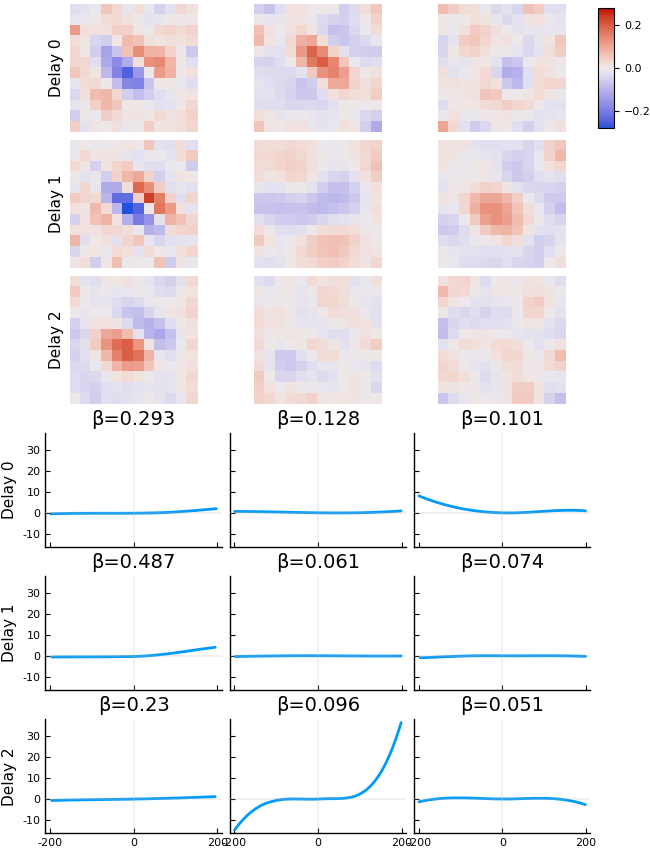

Drop Term: (temporal-2, spatial-3) with β: 0.05088270573054491.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.292691, 0.127642, 0.100915, 0.4869, 0.0607827, 0.0738603, 0.229711, 0.0956281]
New βs: [0.30193, 0.13676, 0.1068, 0.512175, 0.0648608, 0.0958875, 0.261701, 0.118204]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11160.078247208405, PenaltyLoss: 58.1272645071562.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9826911880280574
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11151.570045871717, PenaltyLoss: 56.732534040220045.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9758253596683197
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00017208527154773264.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11152.182101712093, PenaltyLoss: 26.80787852611975.
N

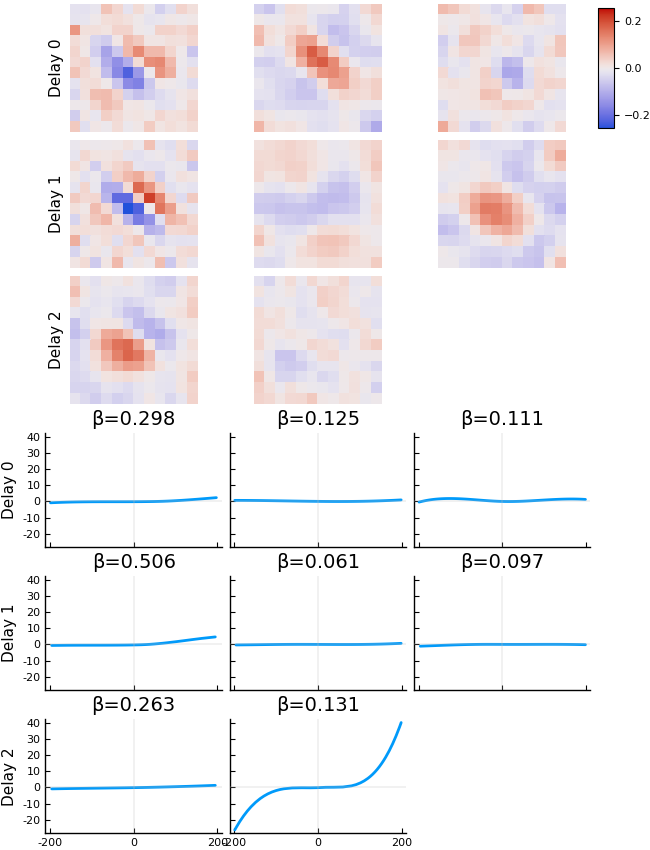

Drop Term: (temporal-1, spatial-2) with β: 0.06141743151630634.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.297902, 0.125009, 0.110501, 0.505773, 0.0971803, 0.263075, 0.131454]
New βs: [0.305726, 0.132378, 0.11885, 0.545167, 0.12678, 0.292418, 0.157445]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11113.492349007109, PenaltyLoss: 55.44278114150626.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.981997810119898
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11106.584636234847, PenaltyLoss: 54.79966599490305.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9805564552947262
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001330859059124627.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11106.7810112709, PenaltyLoss: 23.38070124825832.
NewtonTrustRegion 1th ite

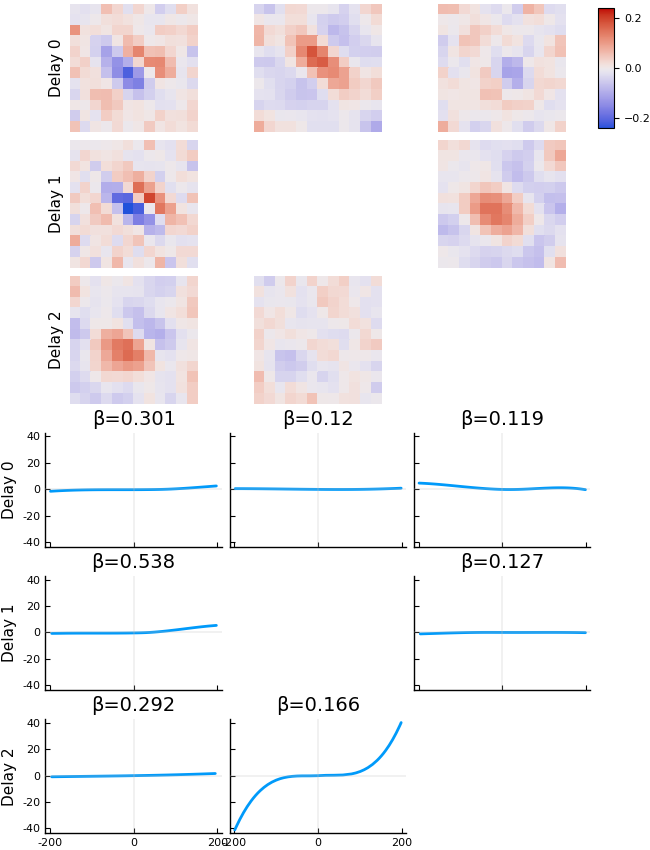

Drop Term: (temporal-0, spatial-3) with β: 0.1193557595988149.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.300811, 0.120331, 0.537829, 0.12678, 0.292396, 0.166457]
New βs: [0.304838, 0.136711, 0.566354, 0.155626, 0.325279, 0.197098]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11186.916296264842, PenaltyLoss: 53.79016709358594.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1959043623310694
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11171.40021788206, PenaltyLoss: 55.0166805638251.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1143781393960335
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00019530488401489442.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11169.900411901335, PenaltyLoss: 21.576044343127236.
NewtonTrustRegion 1th iteration, r = 1.0
  

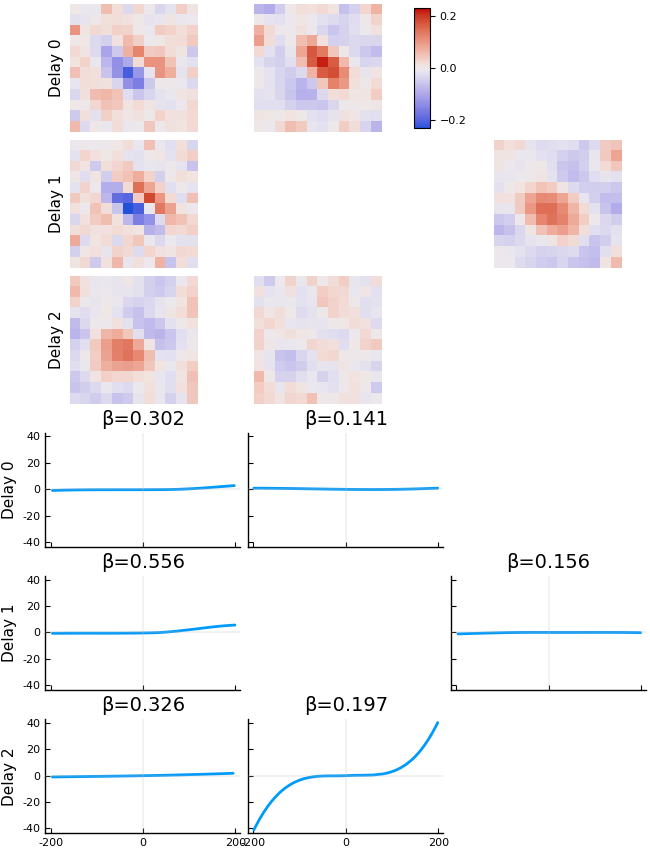

Drop Term: (temporal-0, spatial-2) with β: 0.14086658593861676.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.301527, 0.556088, 0.155626, 0.326047, 0.197098]
New βs: [0.299526, 0.575882, 0.170785, 0.34522, 0.221925]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11304.313515953658, PenaltyLoss: 53.795830185121716.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.169225962452238
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11295.539878878564, PenaltyLoss: 54.31596203686898.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1226876065370461
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00015777932488785355.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11293.82220235327, PenaltyLoss: 106.3351963516091.
NewtonTrustRegion 1th iteration, r = 1.0
                     

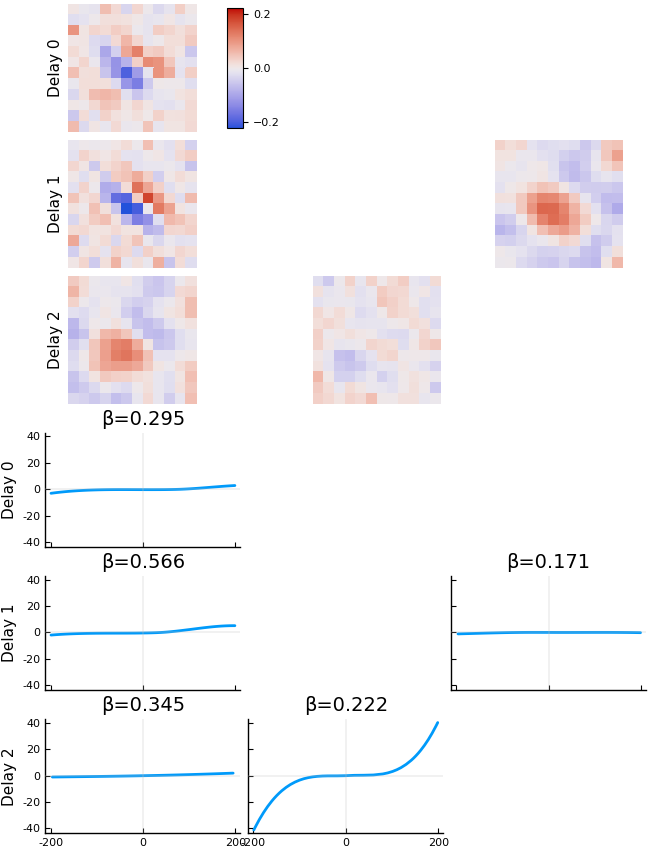

Drop Term: (temporal-1, spatial-3) with β: 0.17078543737495816.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.295086, 0.565525, 0.345097, 0.221925]
New βs: [0.305001, 0.478748, 0.362884, 0.243822]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11463.62692173224, PenaltyLoss: 53.837702068673075.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.056399982111519
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11458.488481413095, PenaltyLoss: 52.96775279950312.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.035312402809001
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 9.840269747604582e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11459.301881282583, PenaltyLoss: 101.46874923808957.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.876

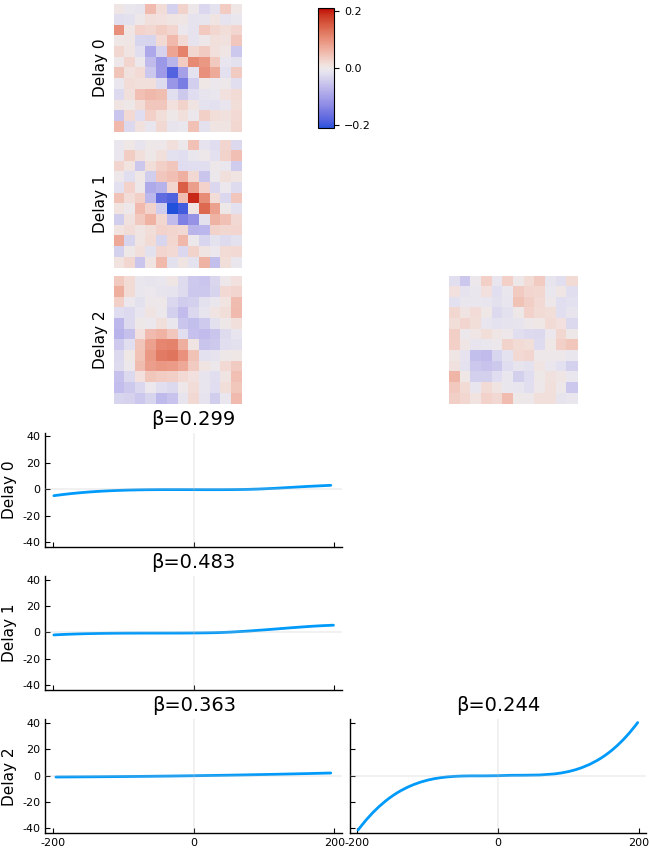

Drop Term: (temporal-2, spatial-2) with β: 0.24382245645409686.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.29888, 0.482936, 0.362562]
New βs: [0.305985, 0.490995, 0.167821]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11552.151444330782, PenaltyLoss: 52.04064517791071.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9701625203134907
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11547.187586328826, PenaltyLoss: 51.26543560576003.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9781367705174692
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 6.874952389632738e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11542.536229106789, PenaltyLoss: 106.36183283452107.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.006175862722106
      

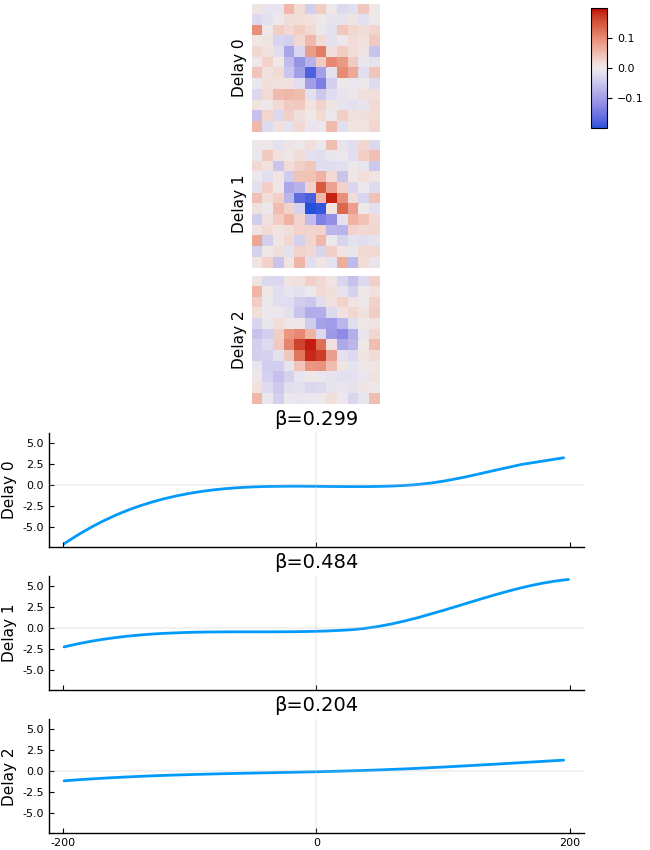

Drop Term: (temporal-2, spatial-1) with β: 0.20417287321133462.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.299289, 0.483817]
New βs: [0.306414, 0.493322]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11769.4296264768, PenaltyLoss: 50.489024374674166.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0334813521614556
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11764.67386164967, PenaltyLoss: 49.82962915248984.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.010710996142071
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 6.293911747177733e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11761.14914130163, PenaltyLoss: 100.9224636029595.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9842933784259196
                             

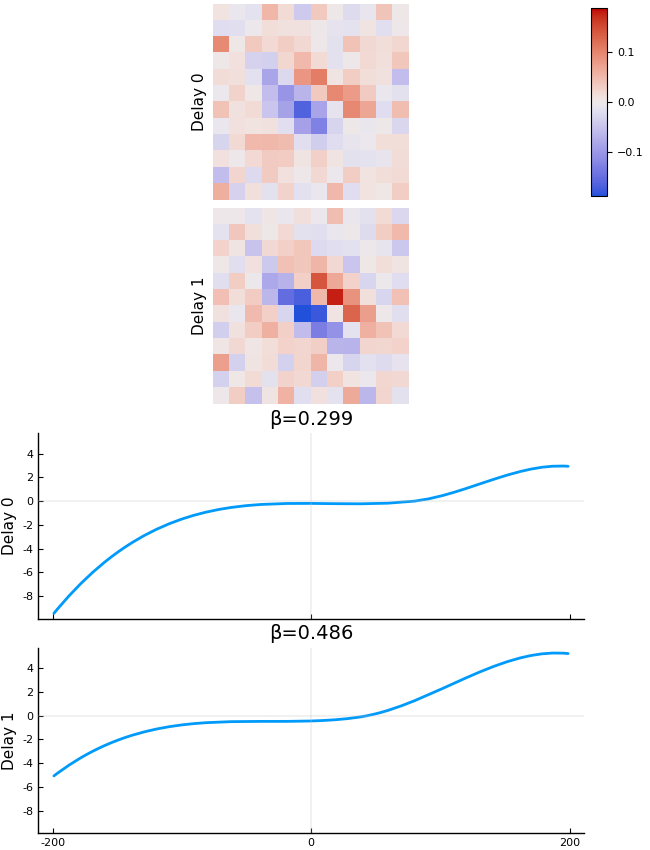

Drop Term: (temporal-0, spatial-1) with β: 0.2994068824004965.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.485614]
New βs: [0.496625]
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12552.94953450359, PenaltyLoss: 95.78405404386852.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0145952931128406
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12542.257911098472, PenaltyLoss: 96.50032256284675.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9929261274172122
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.883497822456461e-5.


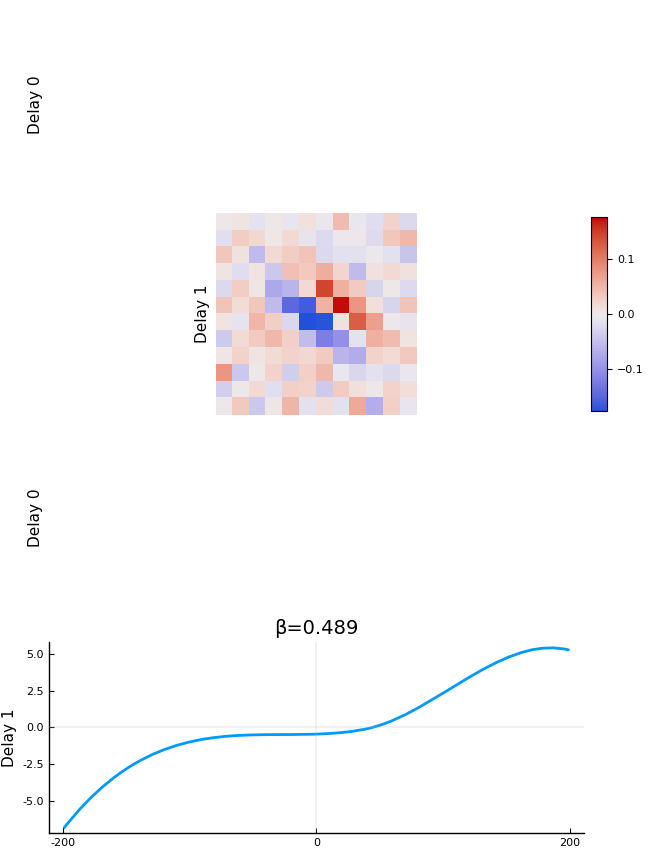

ePPR Models Cross Validation ...


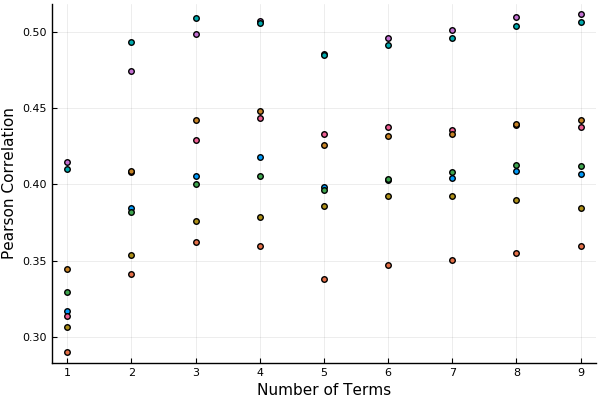

4th model with 4 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Fit Model (Temporal-2, Spatial-2) New Term ...
Refit Model βs ...
Old βs: [0.300317, 0.483742, 0.171516, 0.0817159]
New βs: [0.307217, 0.492352, 0.30247, 0.182842]
Cross Validated ePPR Done.


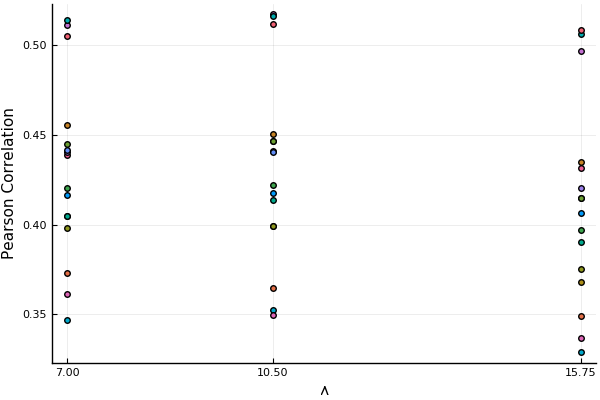

HyperParameter search done with best λ = 10.5.


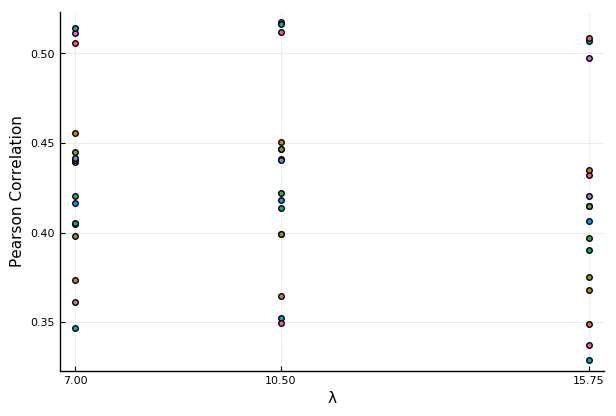

In [9]:
using ePPR
hp=ePPRHyperParams(imagesize...,lambda=7)
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprhypercv(x,y1,hp,debug);

### Final Model

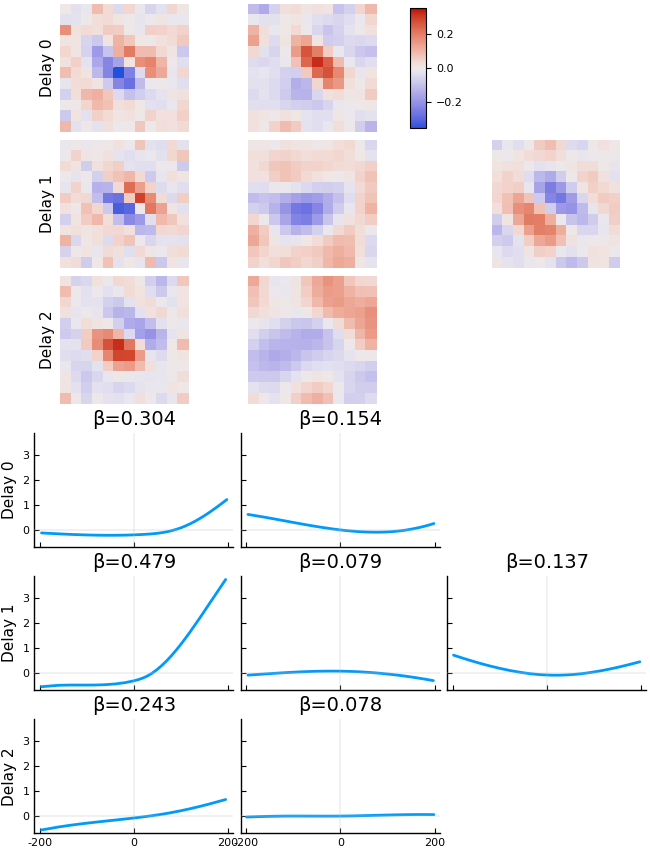

In [10]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Nonlinear Time Interaction, pool x[i-3:i, :] together ...
Choose 1th trainset.
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 12499.690252790753, PenaltyLoss: 322.0431534051498.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8806366239683141
                                 step is easy
New Term 2th iteration. TermLoss: 11949.101346416175, PenaltyLoss: 398.58489136025906.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9539390313077185
                                 step is λ = 0
New Term 3th iteration. TermLoss: 11811.571139508684, PenaltyLoss: 387.58392450465334.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9242645183290653
                                 step is λ = 0
New Term converged in 3

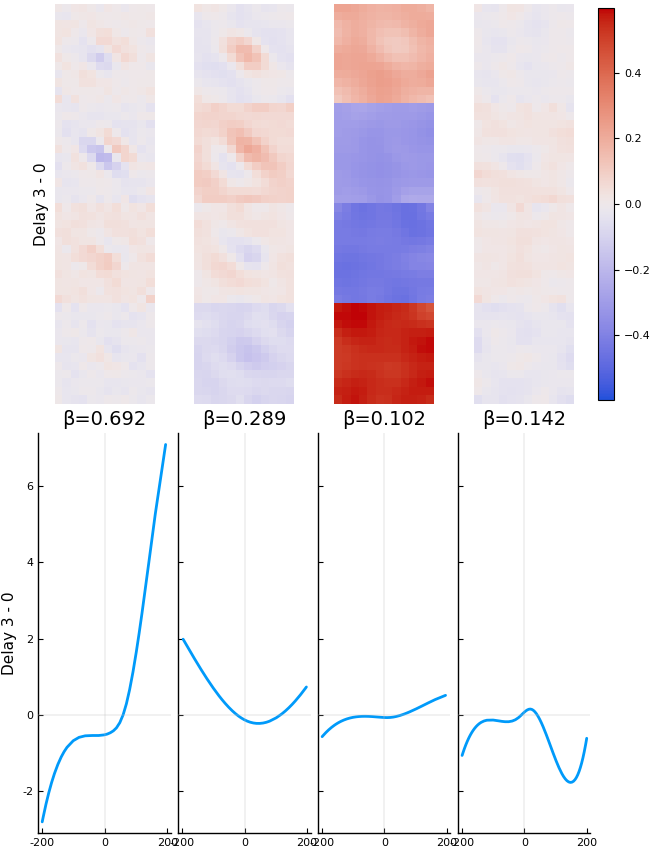

Drop Term: (temporal-0, spatial-3) with β: 0.10158517761844507.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.692102, 0.289321, 0.142353]
New βs: [0.6969, 0.301786, 0.16839]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10481.056335425228, PenaltyLoss: 282.757756303874.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0014033976524723
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10435.44488665851, PenaltyLoss: 277.58671644149985.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.980936297039671
                                 step is λ = 0
New Term 3th iteration. TermLoss: 10414.195914721904, PenaltyLoss: 270.3581722491621.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9775110803224195
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00044744870515845466.
Refi

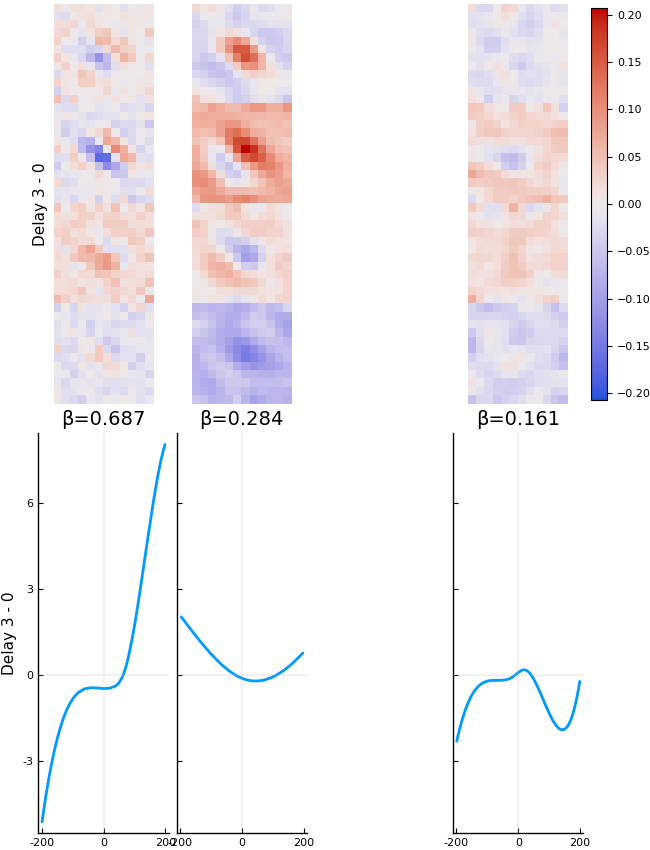

Drop Term: (temporal-0, spatial-4) with β: 0.1610227995686404.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.687419, 0.283661]
New βs: [0.711158, 0.303106]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10656.057961272365, PenaltyLoss: 264.3918791380288.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9219350685592502
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10620.295356351684, PenaltyLoss: 262.17863963705645.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9707229967475061
                                 step is λ = 0
New Term 3th iteration. TermLoss: 10602.837356829896, PenaltyLoss: 256.5881583806009.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.963843791785602
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0003356841094072133.
Refit (Temporal-0, Sp

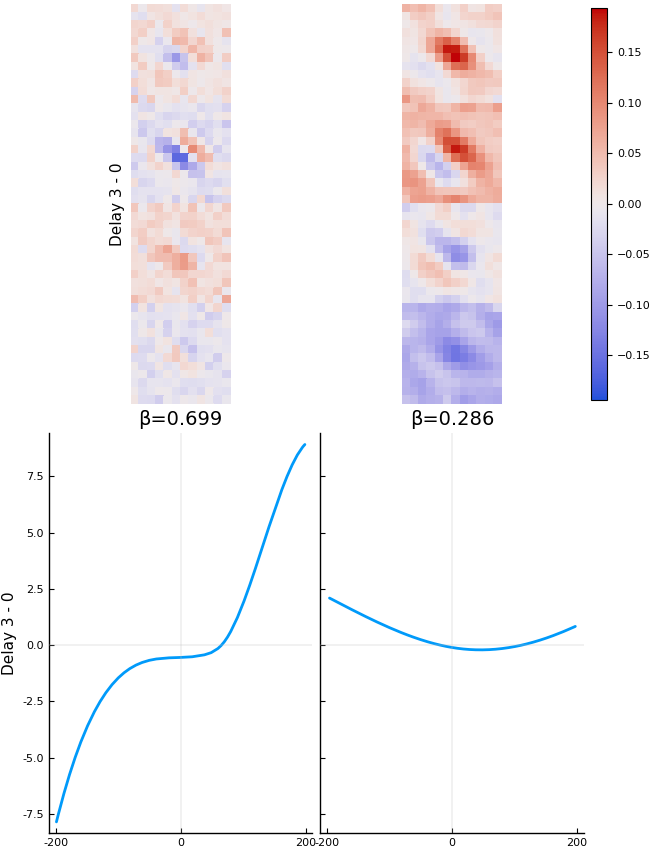

Drop Term: (temporal-0, spatial-2) with β: 0.28645955019223335.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.698753]
New βs: [0.709903]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11361.163916896005, PenaltyLoss: 251.72960964273418.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9814626824775229
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11321.064524646365, PenaltyLoss: 254.72744789479444.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.991722683010328
                                 step is λ = 0
New Term 3th iteration. TermLoss: 11306.837456288014, PenaltyLoss: 250.37867010441278.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9628265635675766
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0002139246771769129.


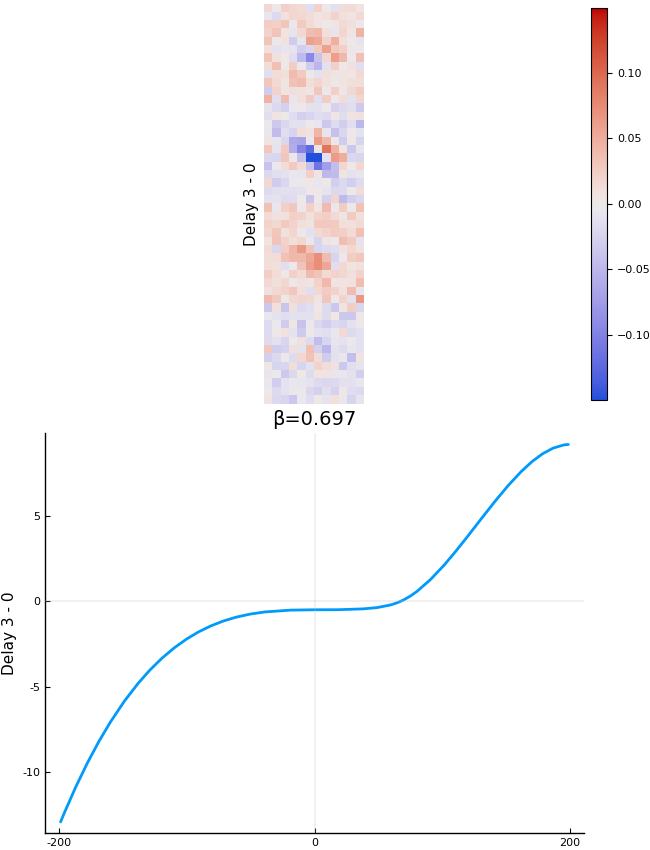

ePPR Models Cross Validation ...


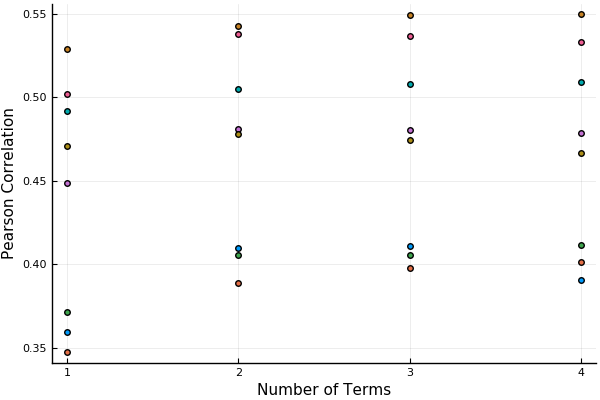

2th model with 2 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Refit Model βs ...
Old βs: [0.692883, 0.286556]
New βs: [0.71829, 0.307309]
Cross Validated ePPR Done.


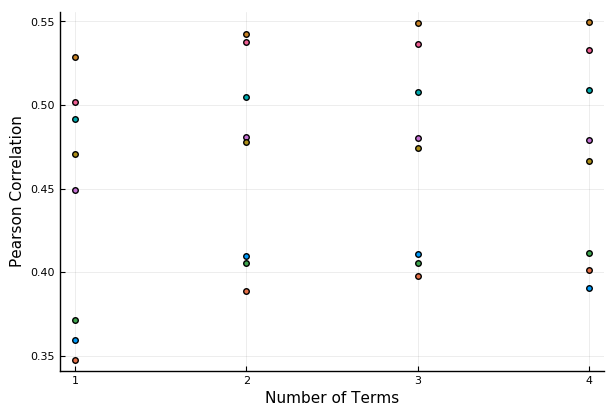

In [7]:
using ePPR
hp=ePPRHyperParams(imagesize...,ndelay=4,lambda=45,nft=[4])
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y1,hp,debug);

### Final Model

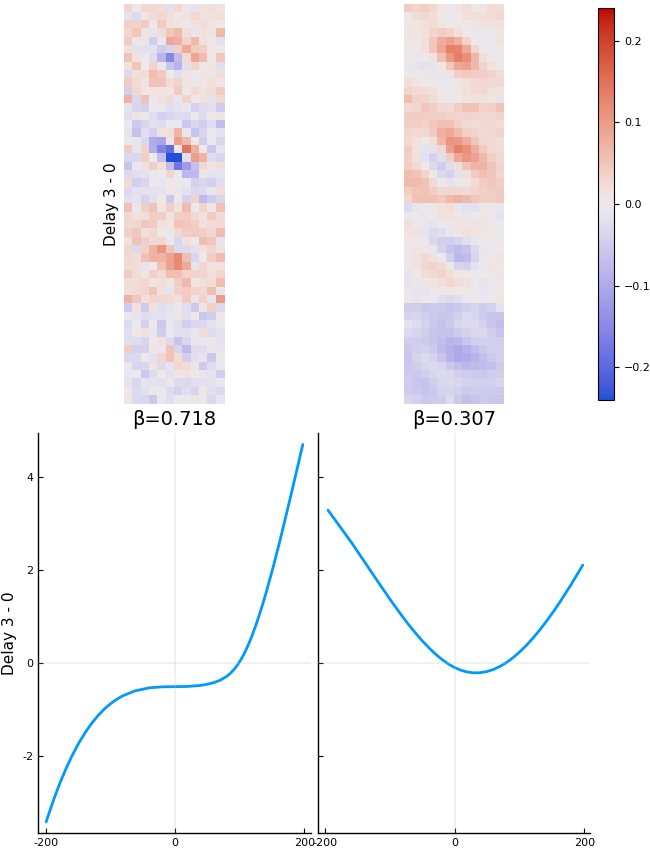

In [8]:
plotmodel(model,hp)

## Benchmark

In [ ]:
using BenchmarkTools
@btime model,models = epprcv(x,y,hp);